# Using SMUP 

You use the `Smup` class to produce *smups* (*S*table *M*atchings *U*seless *P*ictures). A smup is built in two steps:

- A *compute* phase generates the topology of the smup;
- A *display* phase handles the actual drawing/saving.

The following is a minimal code to produce a smup.

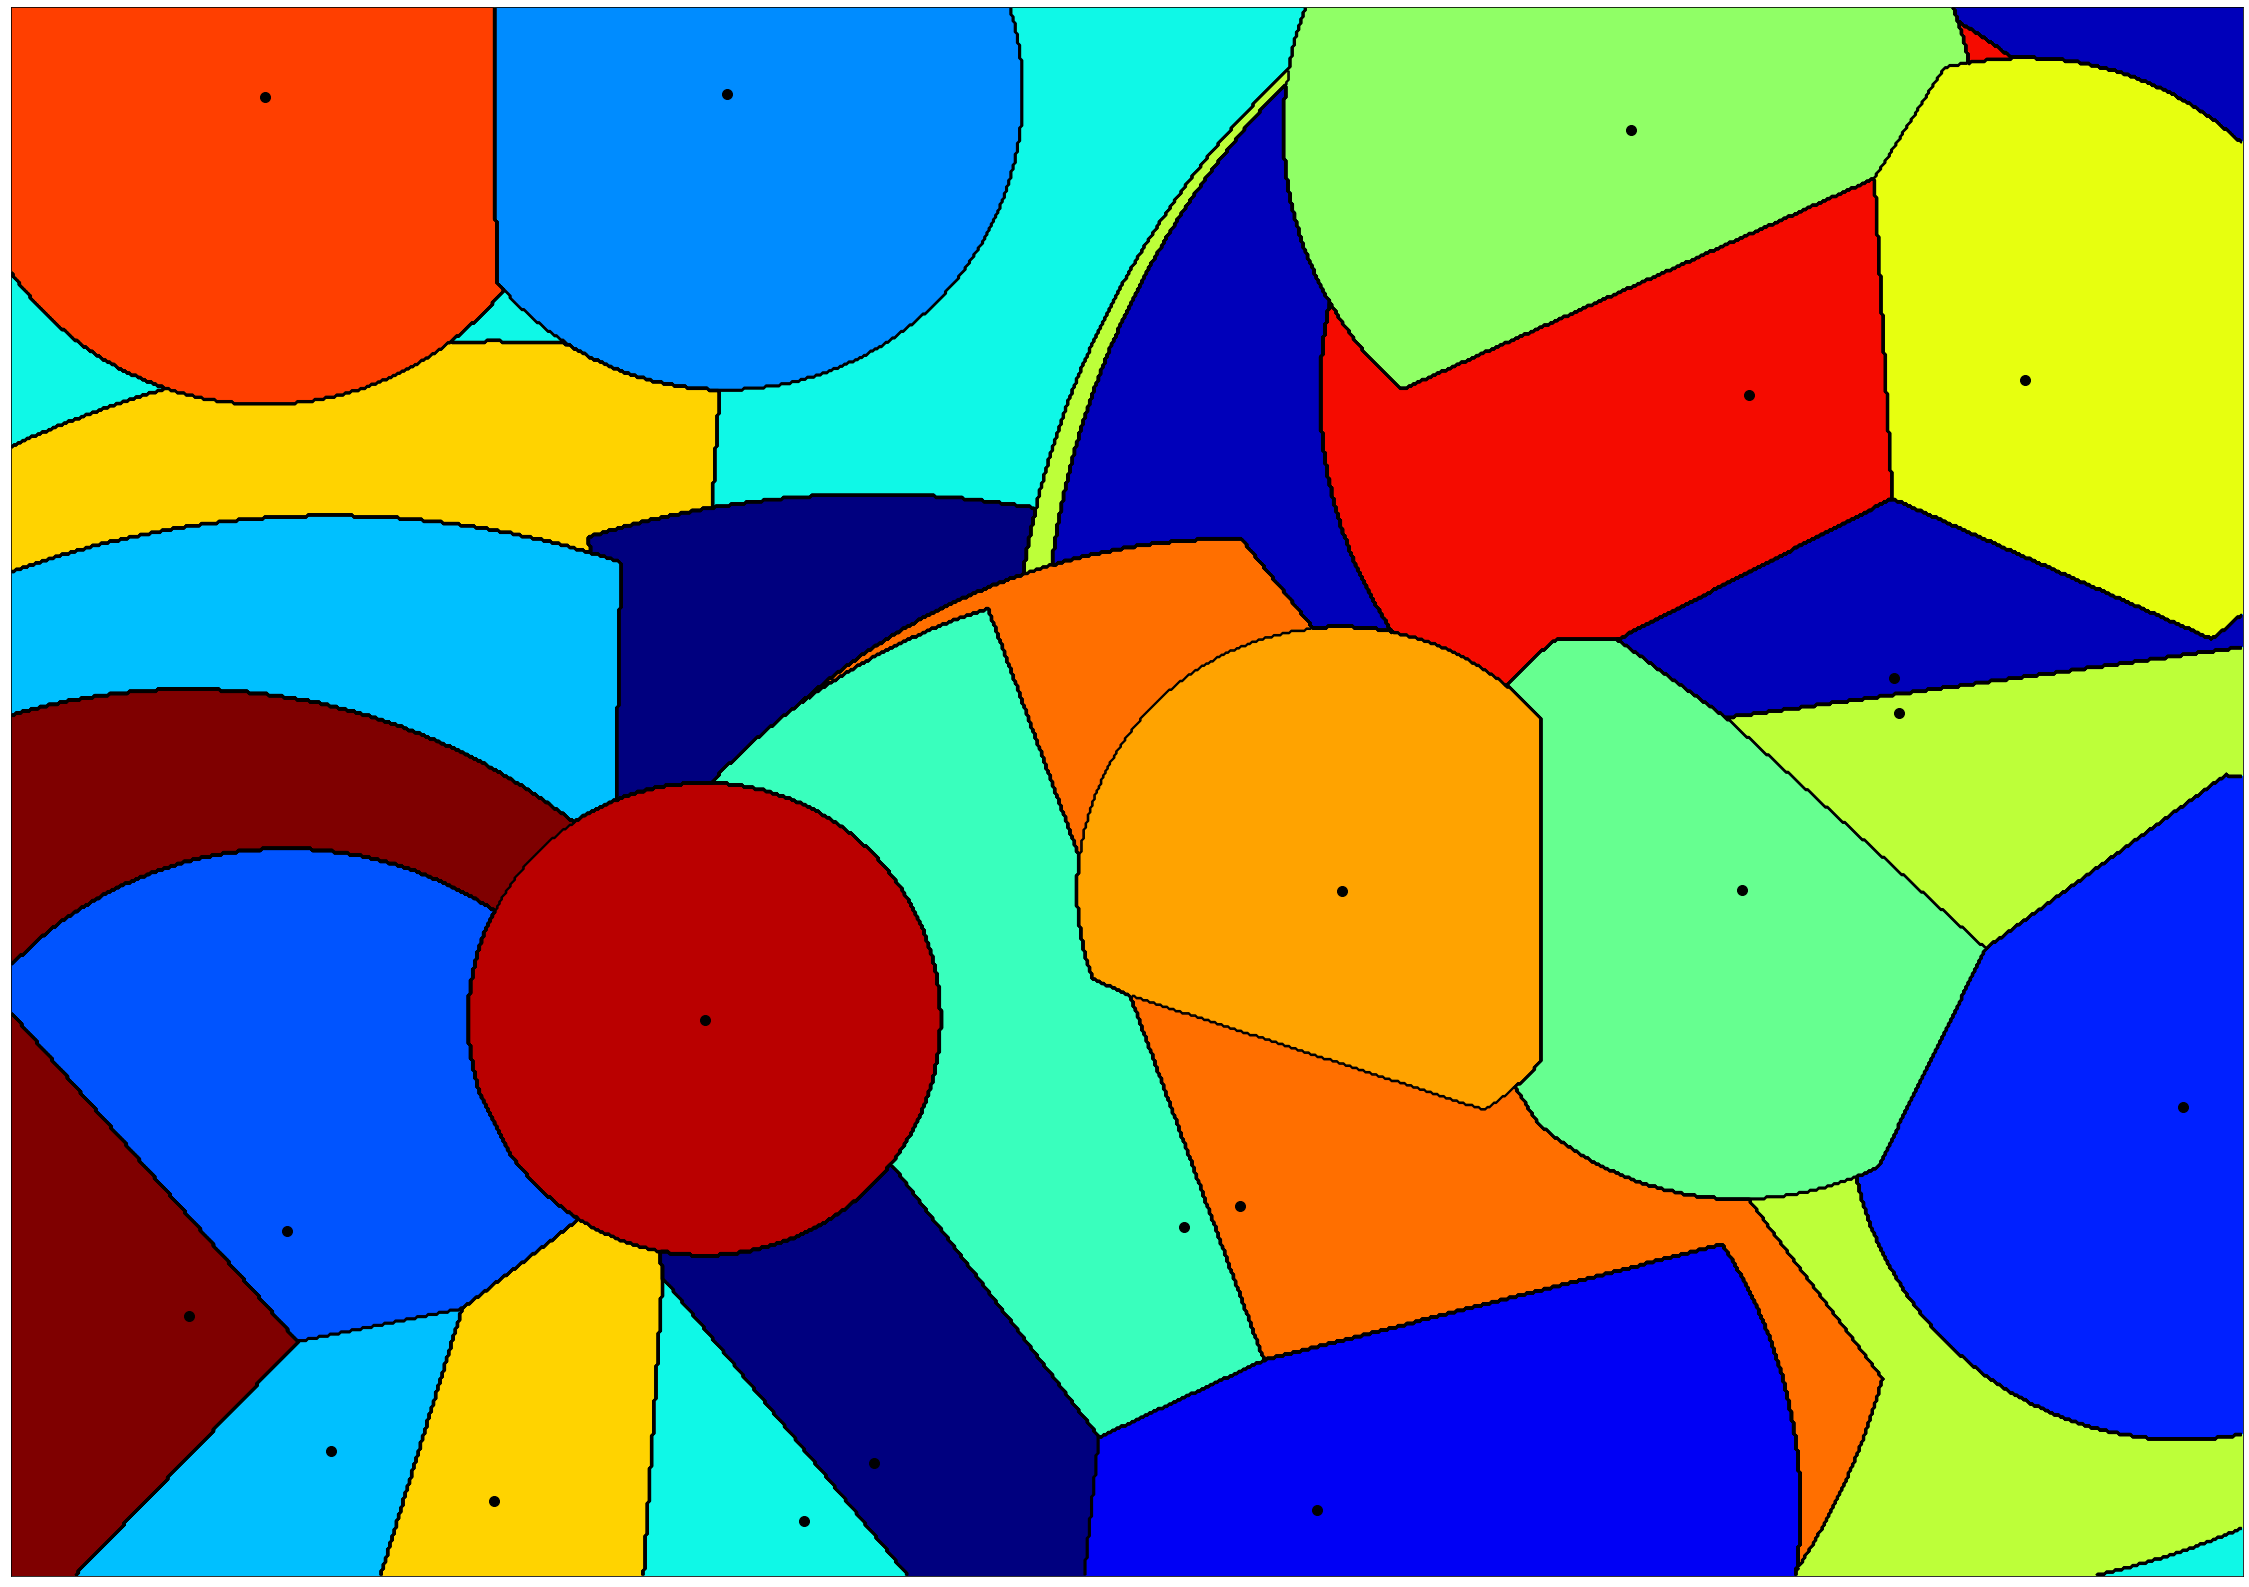

In [1]:
from smup import Smup
smup = Smup()
smup.compute()
smup.display()

## Computational parameters

For computing, you can adjust:

- the distance used;
- the size of the picture;
- the number of sites.

### Norm

By default, the smup will use the Euclidian distance (norm 2), which will shape the sites as (partial) circles. Note the use of a random seed in the code below, which will allows to fix the location of the sites and see the effect of the norm.

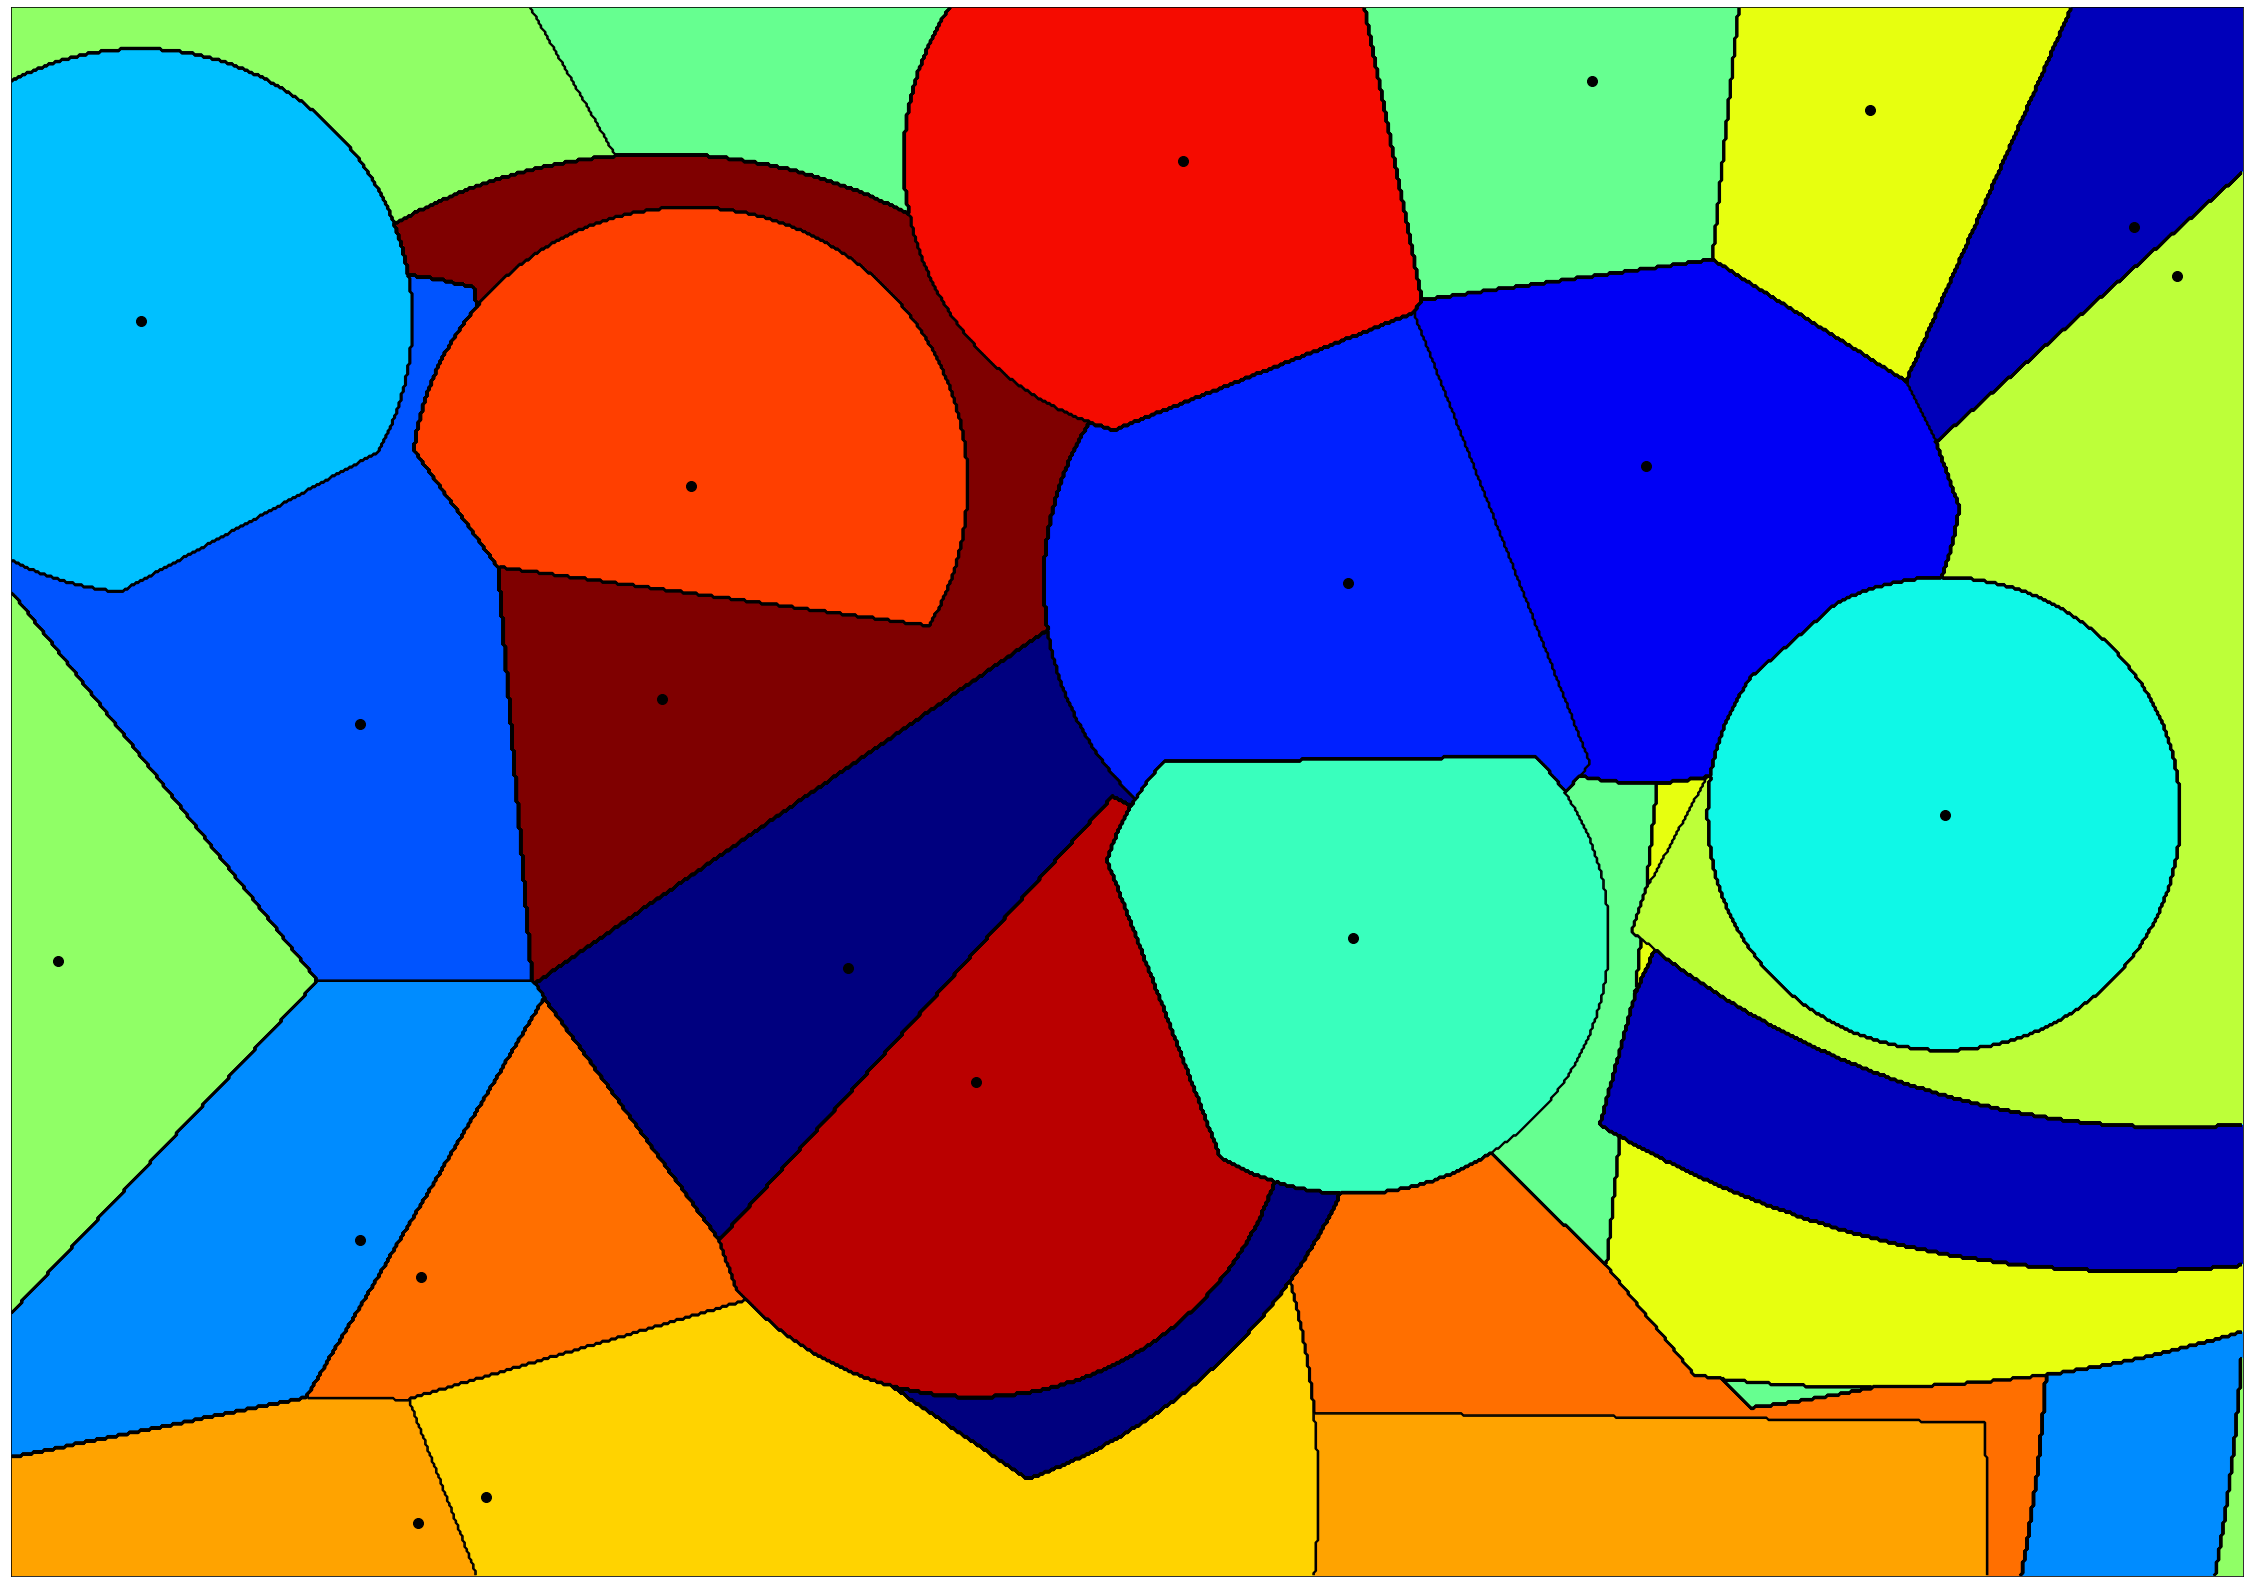

In [2]:
smup.compute(seed=42)
smup.display()

The Manhattan distance (norm 1) will shape the sites as (partial) diamonds. Note the use of a random seed in the code below, which will allows to fix the location of the sites and see the effect of the norm.

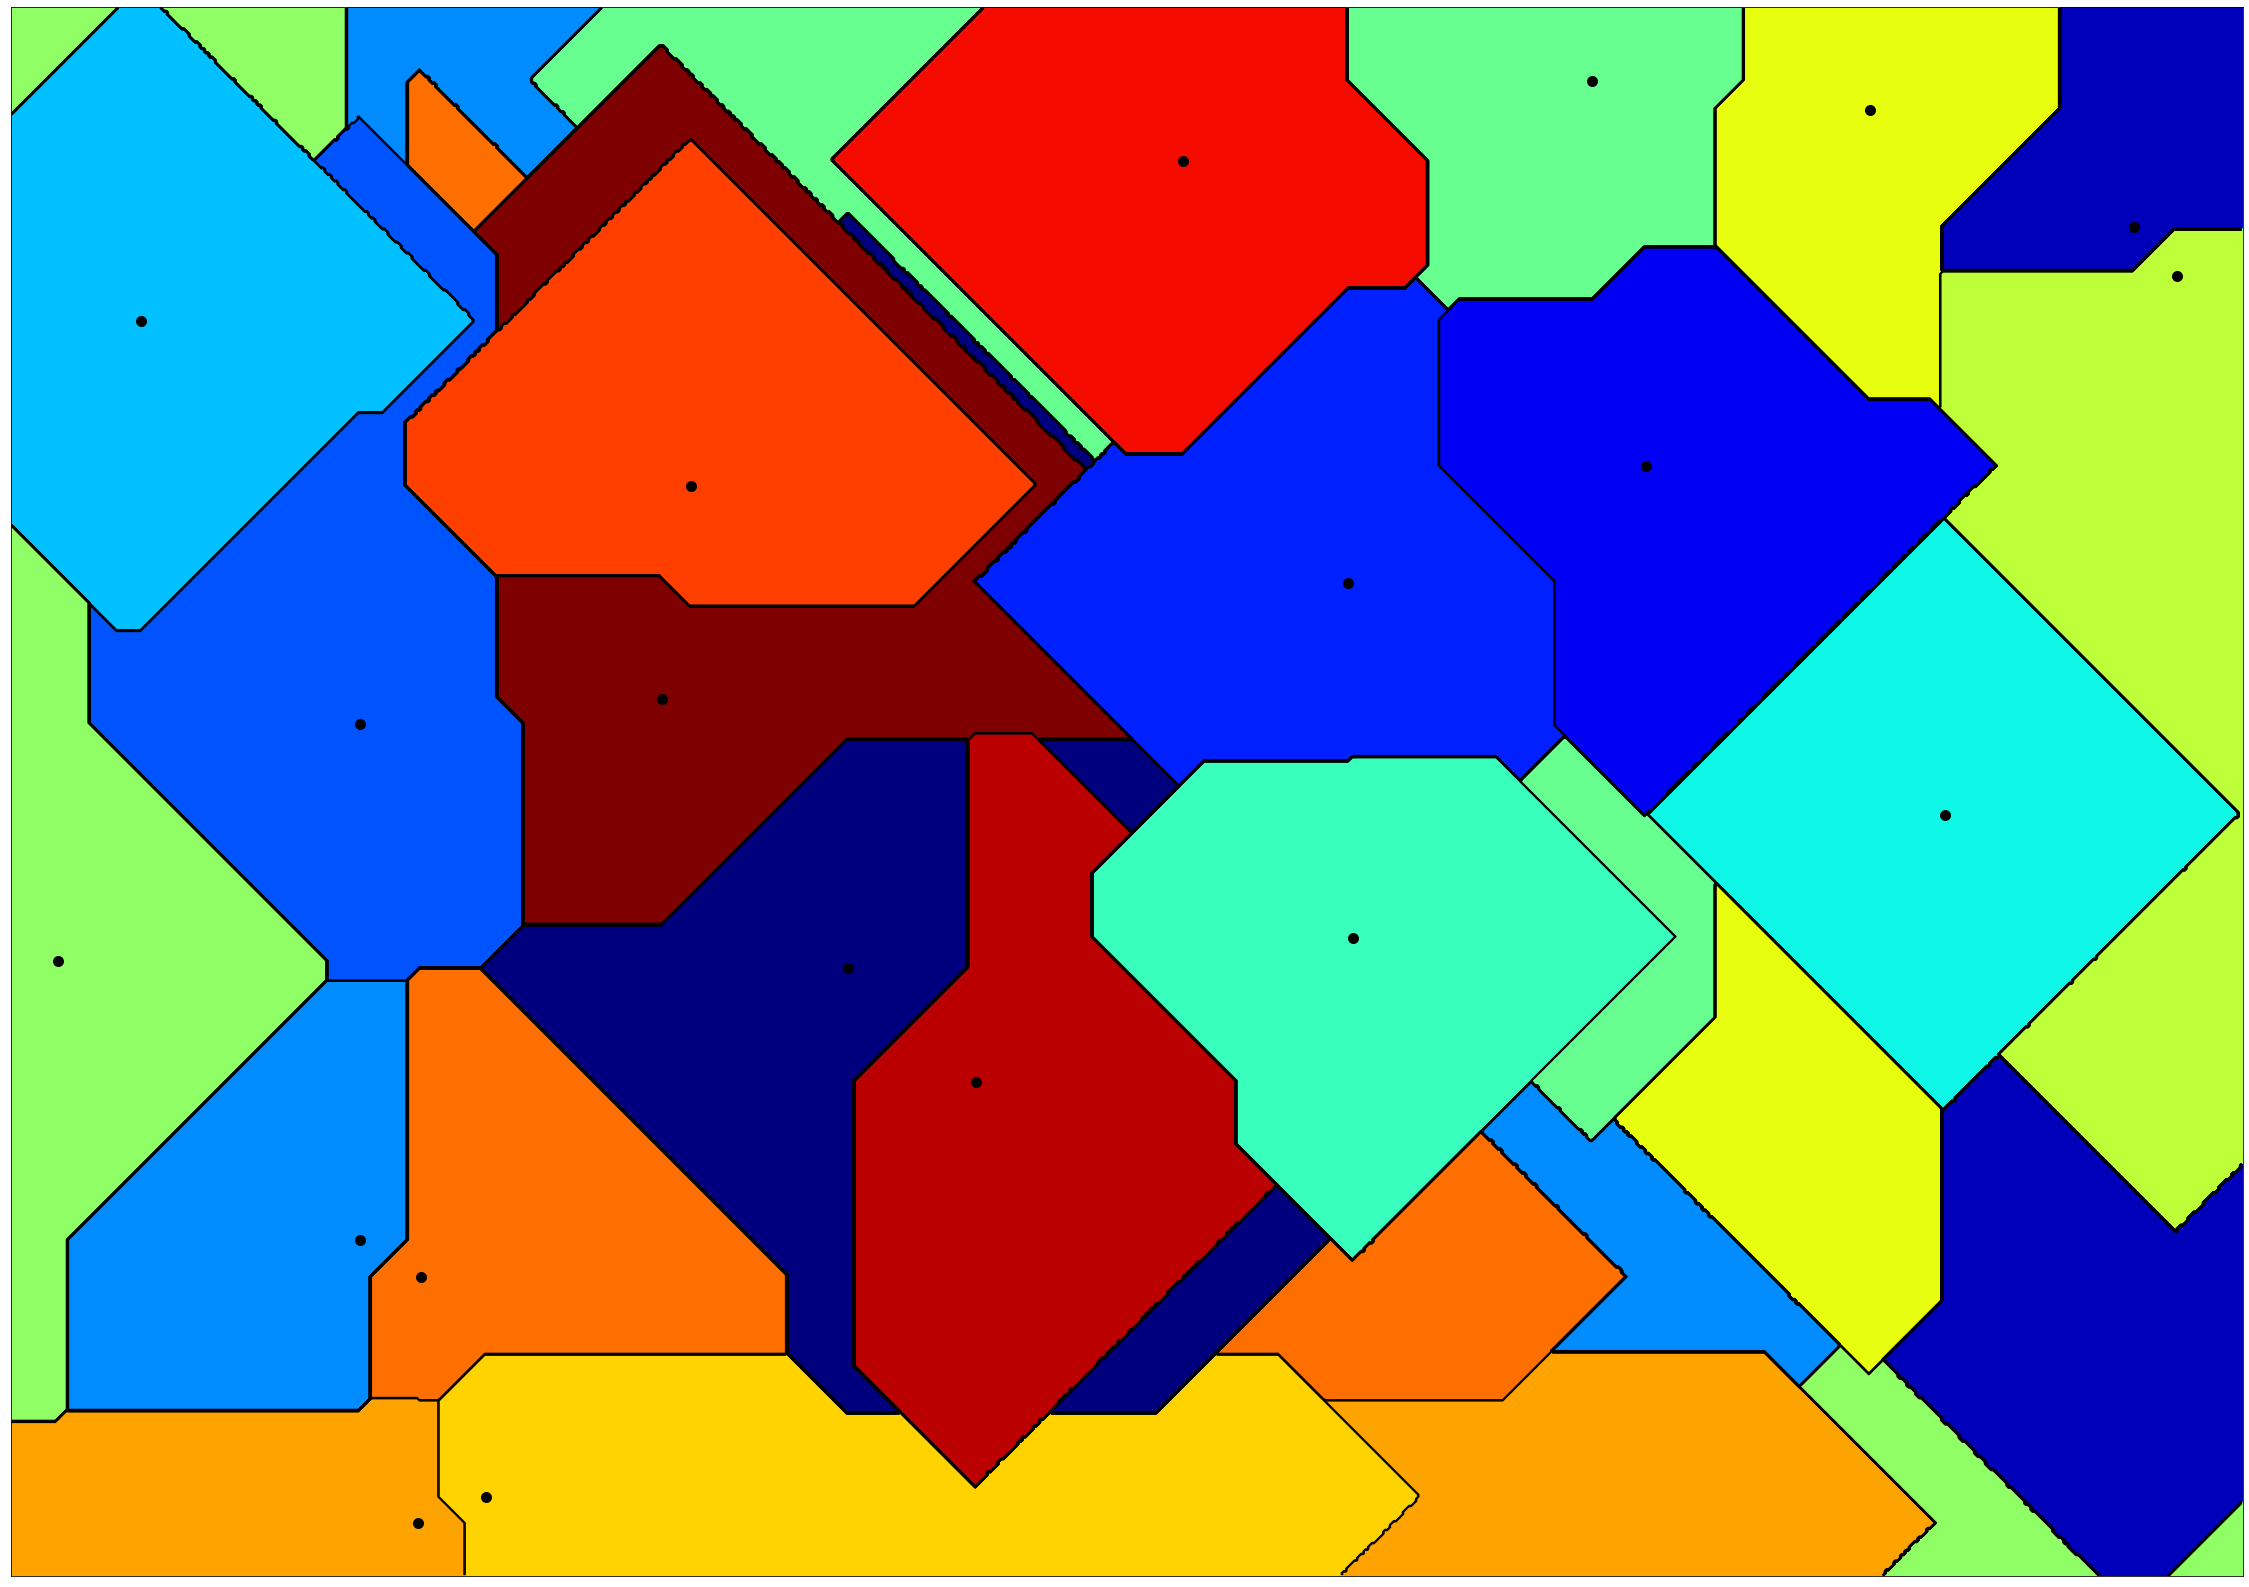

In [3]:
smup.compute(norm=1, seed=42)
smup.display()

The infinite norm will shape the sites as (partial) squares. Note the use of a random seed in the code below, which will allows to fix the location of the sites and see the effect of the norm.

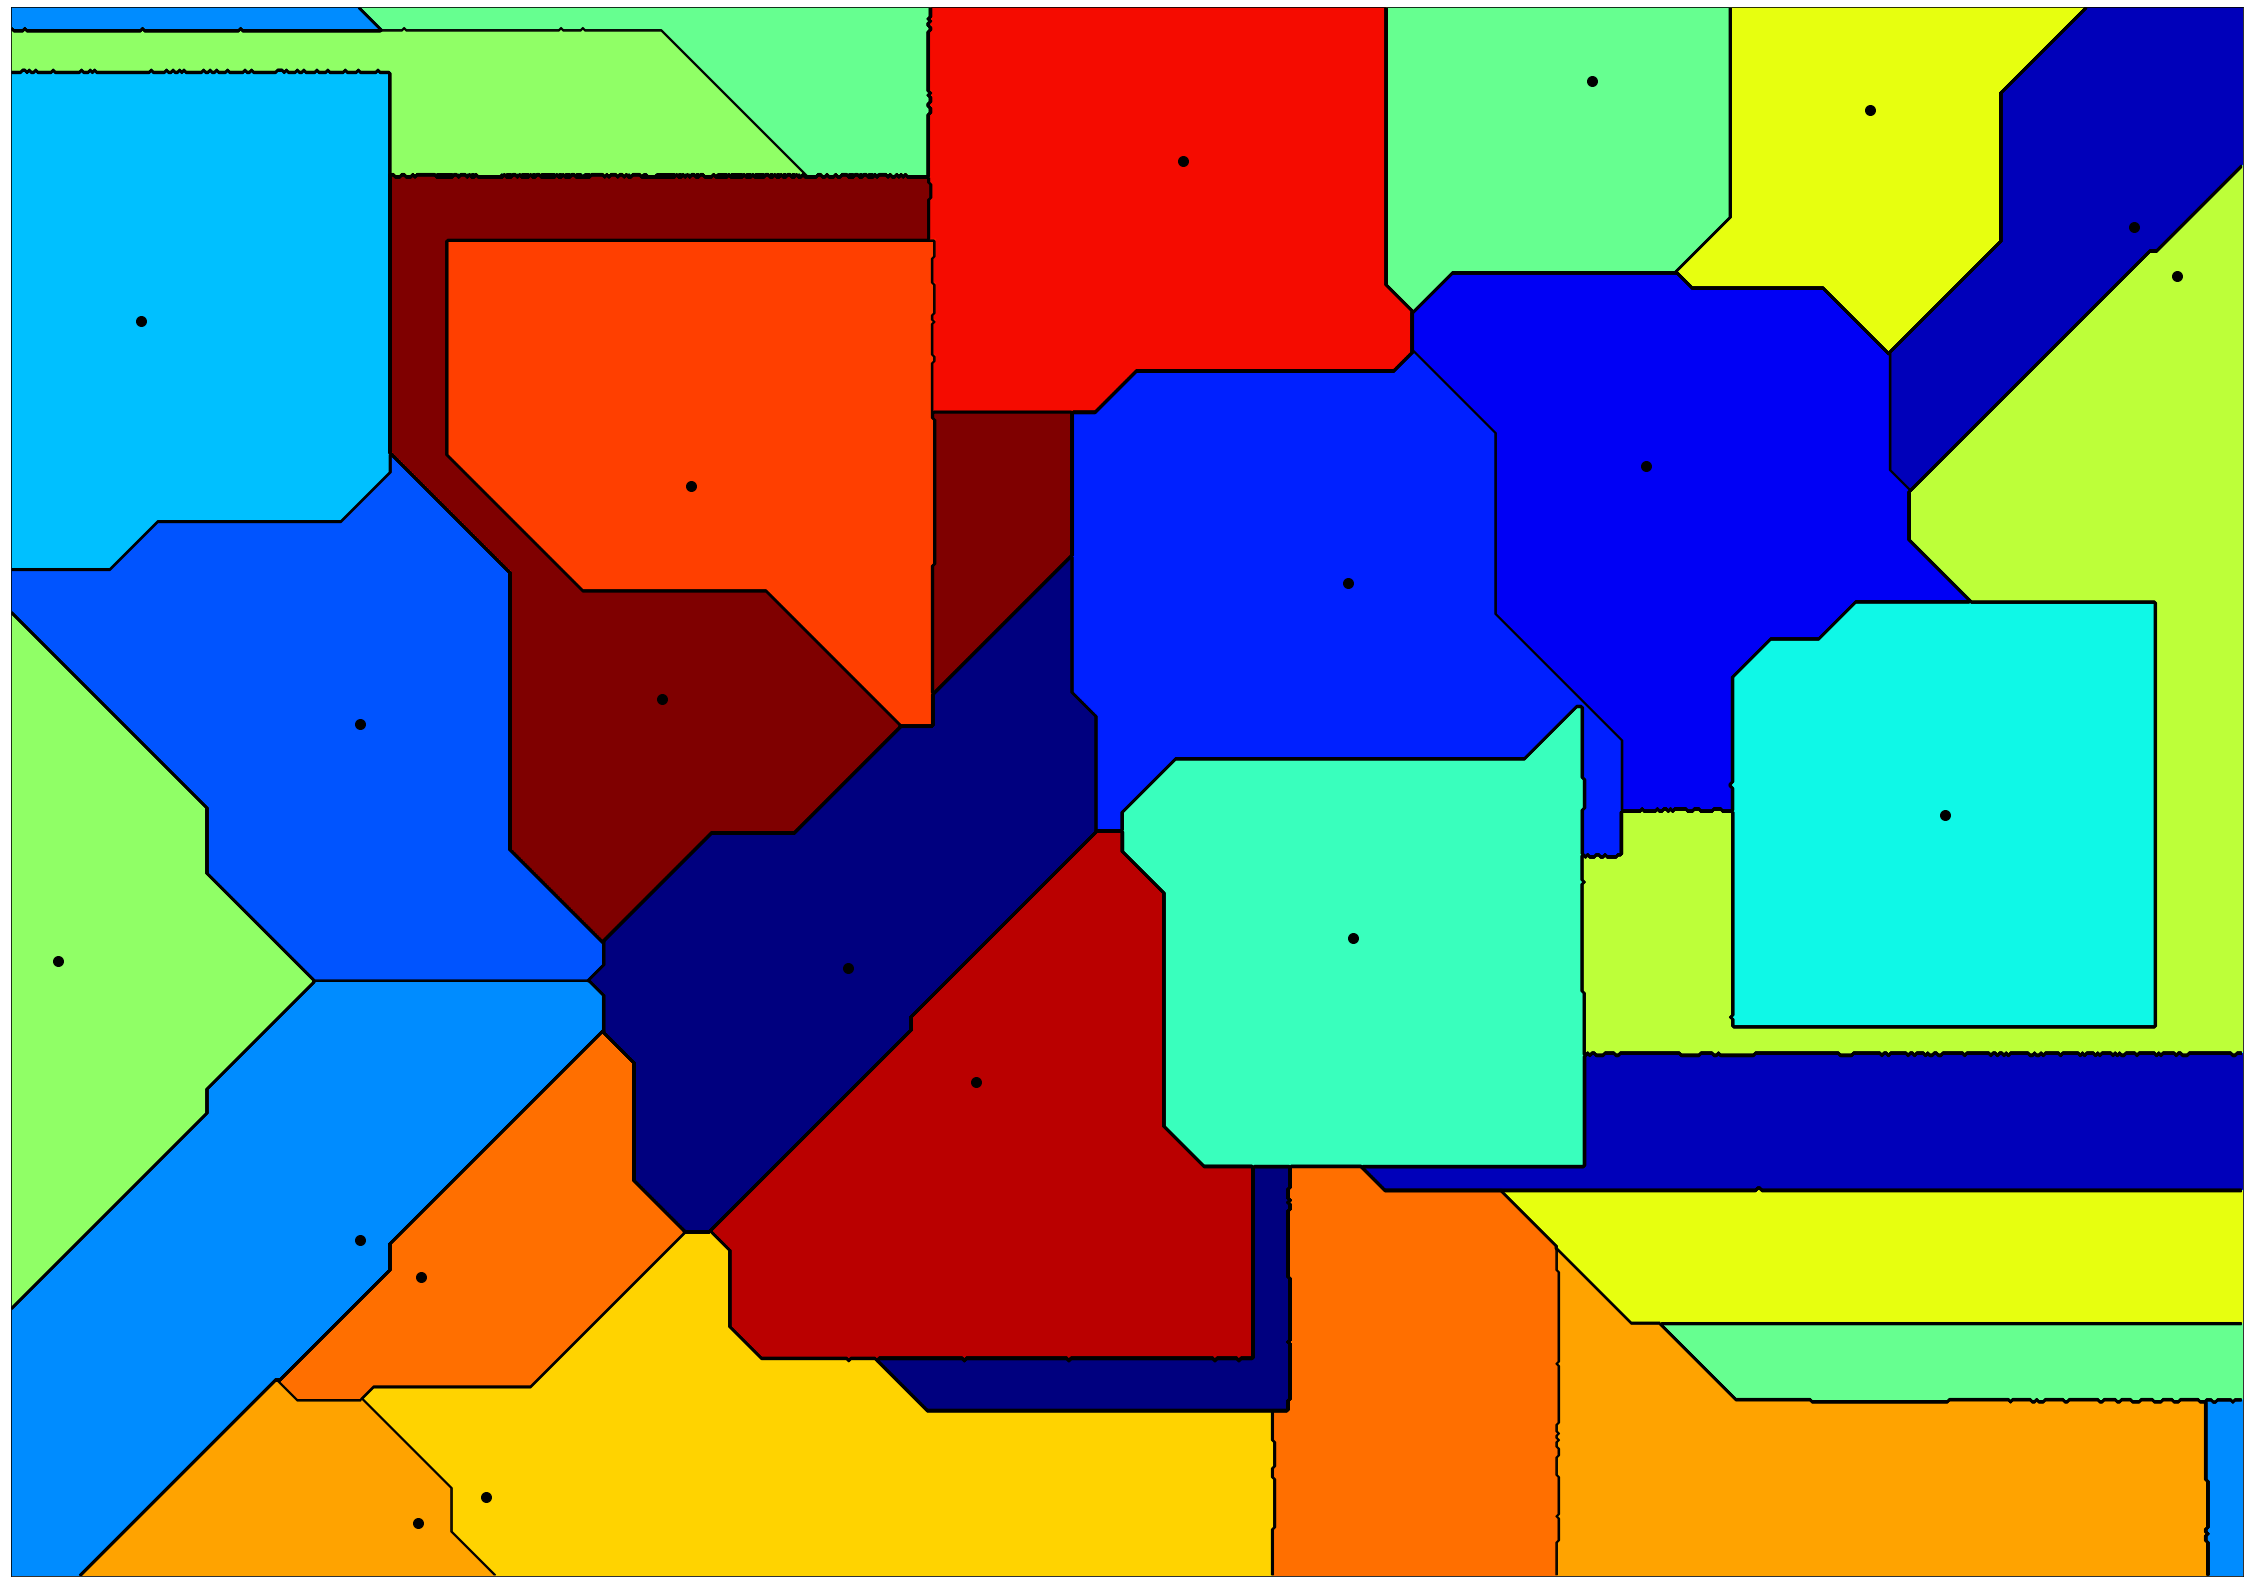

In [4]:
smup.compute(norm="inf", seed=42)
smup.display()

### Size

With `x` and `y` you can change the size of the picture. Note that the computational time is $\tilde{O}(xys)$ and the memory occupation is $O(xys)$. The following draws a fast rough version of the picture above.

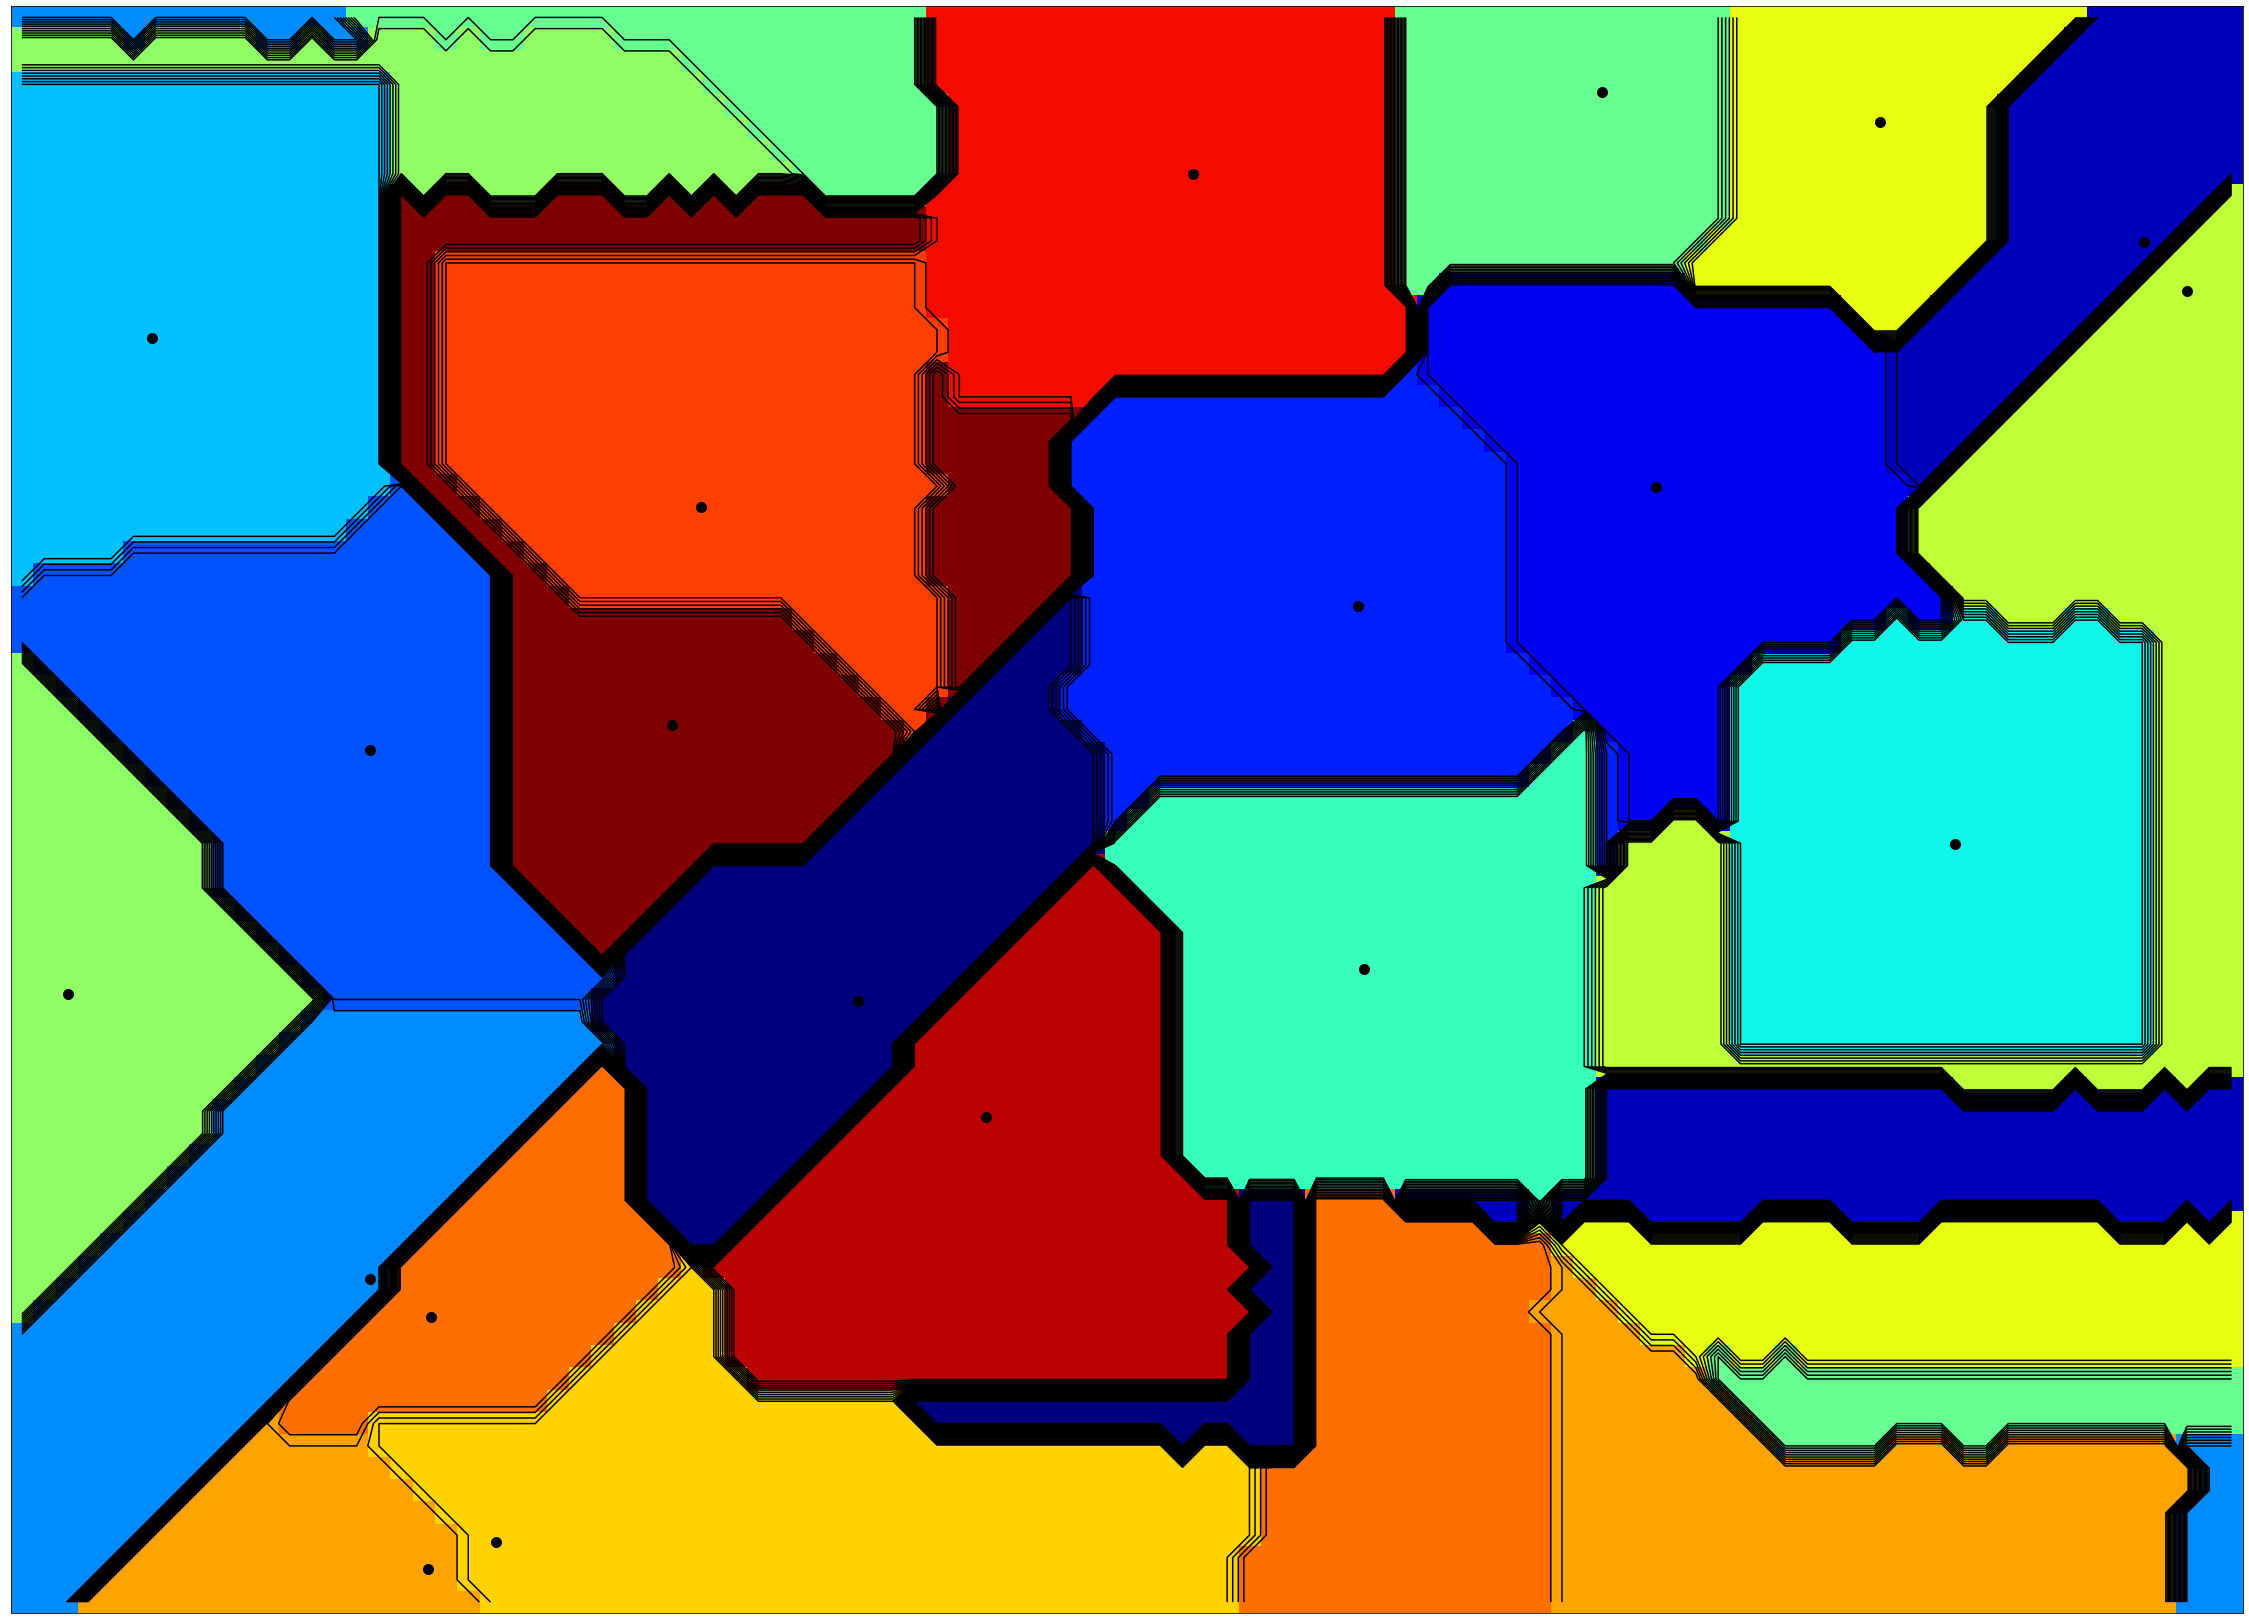

In [5]:
smup.compute(x=100, y=72, norm='inf', seed=42)
smup.display()

You can use `x` or `y` to change the aspect ratio, for example if you want to produce a banner.

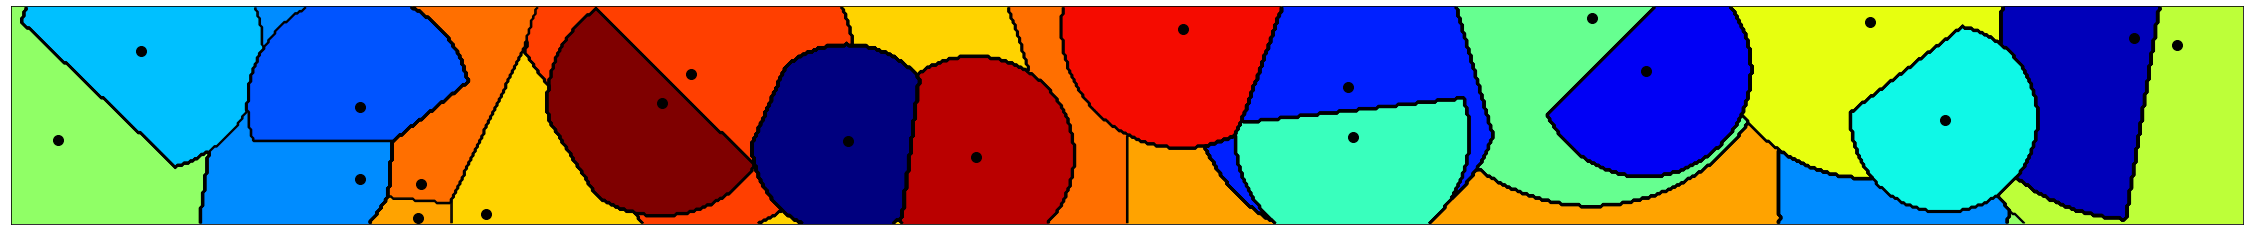

In [6]:
smup.compute(y=100, seed=42)
smup.display()

### Number of areas 

Less sites will give you a simple smup.

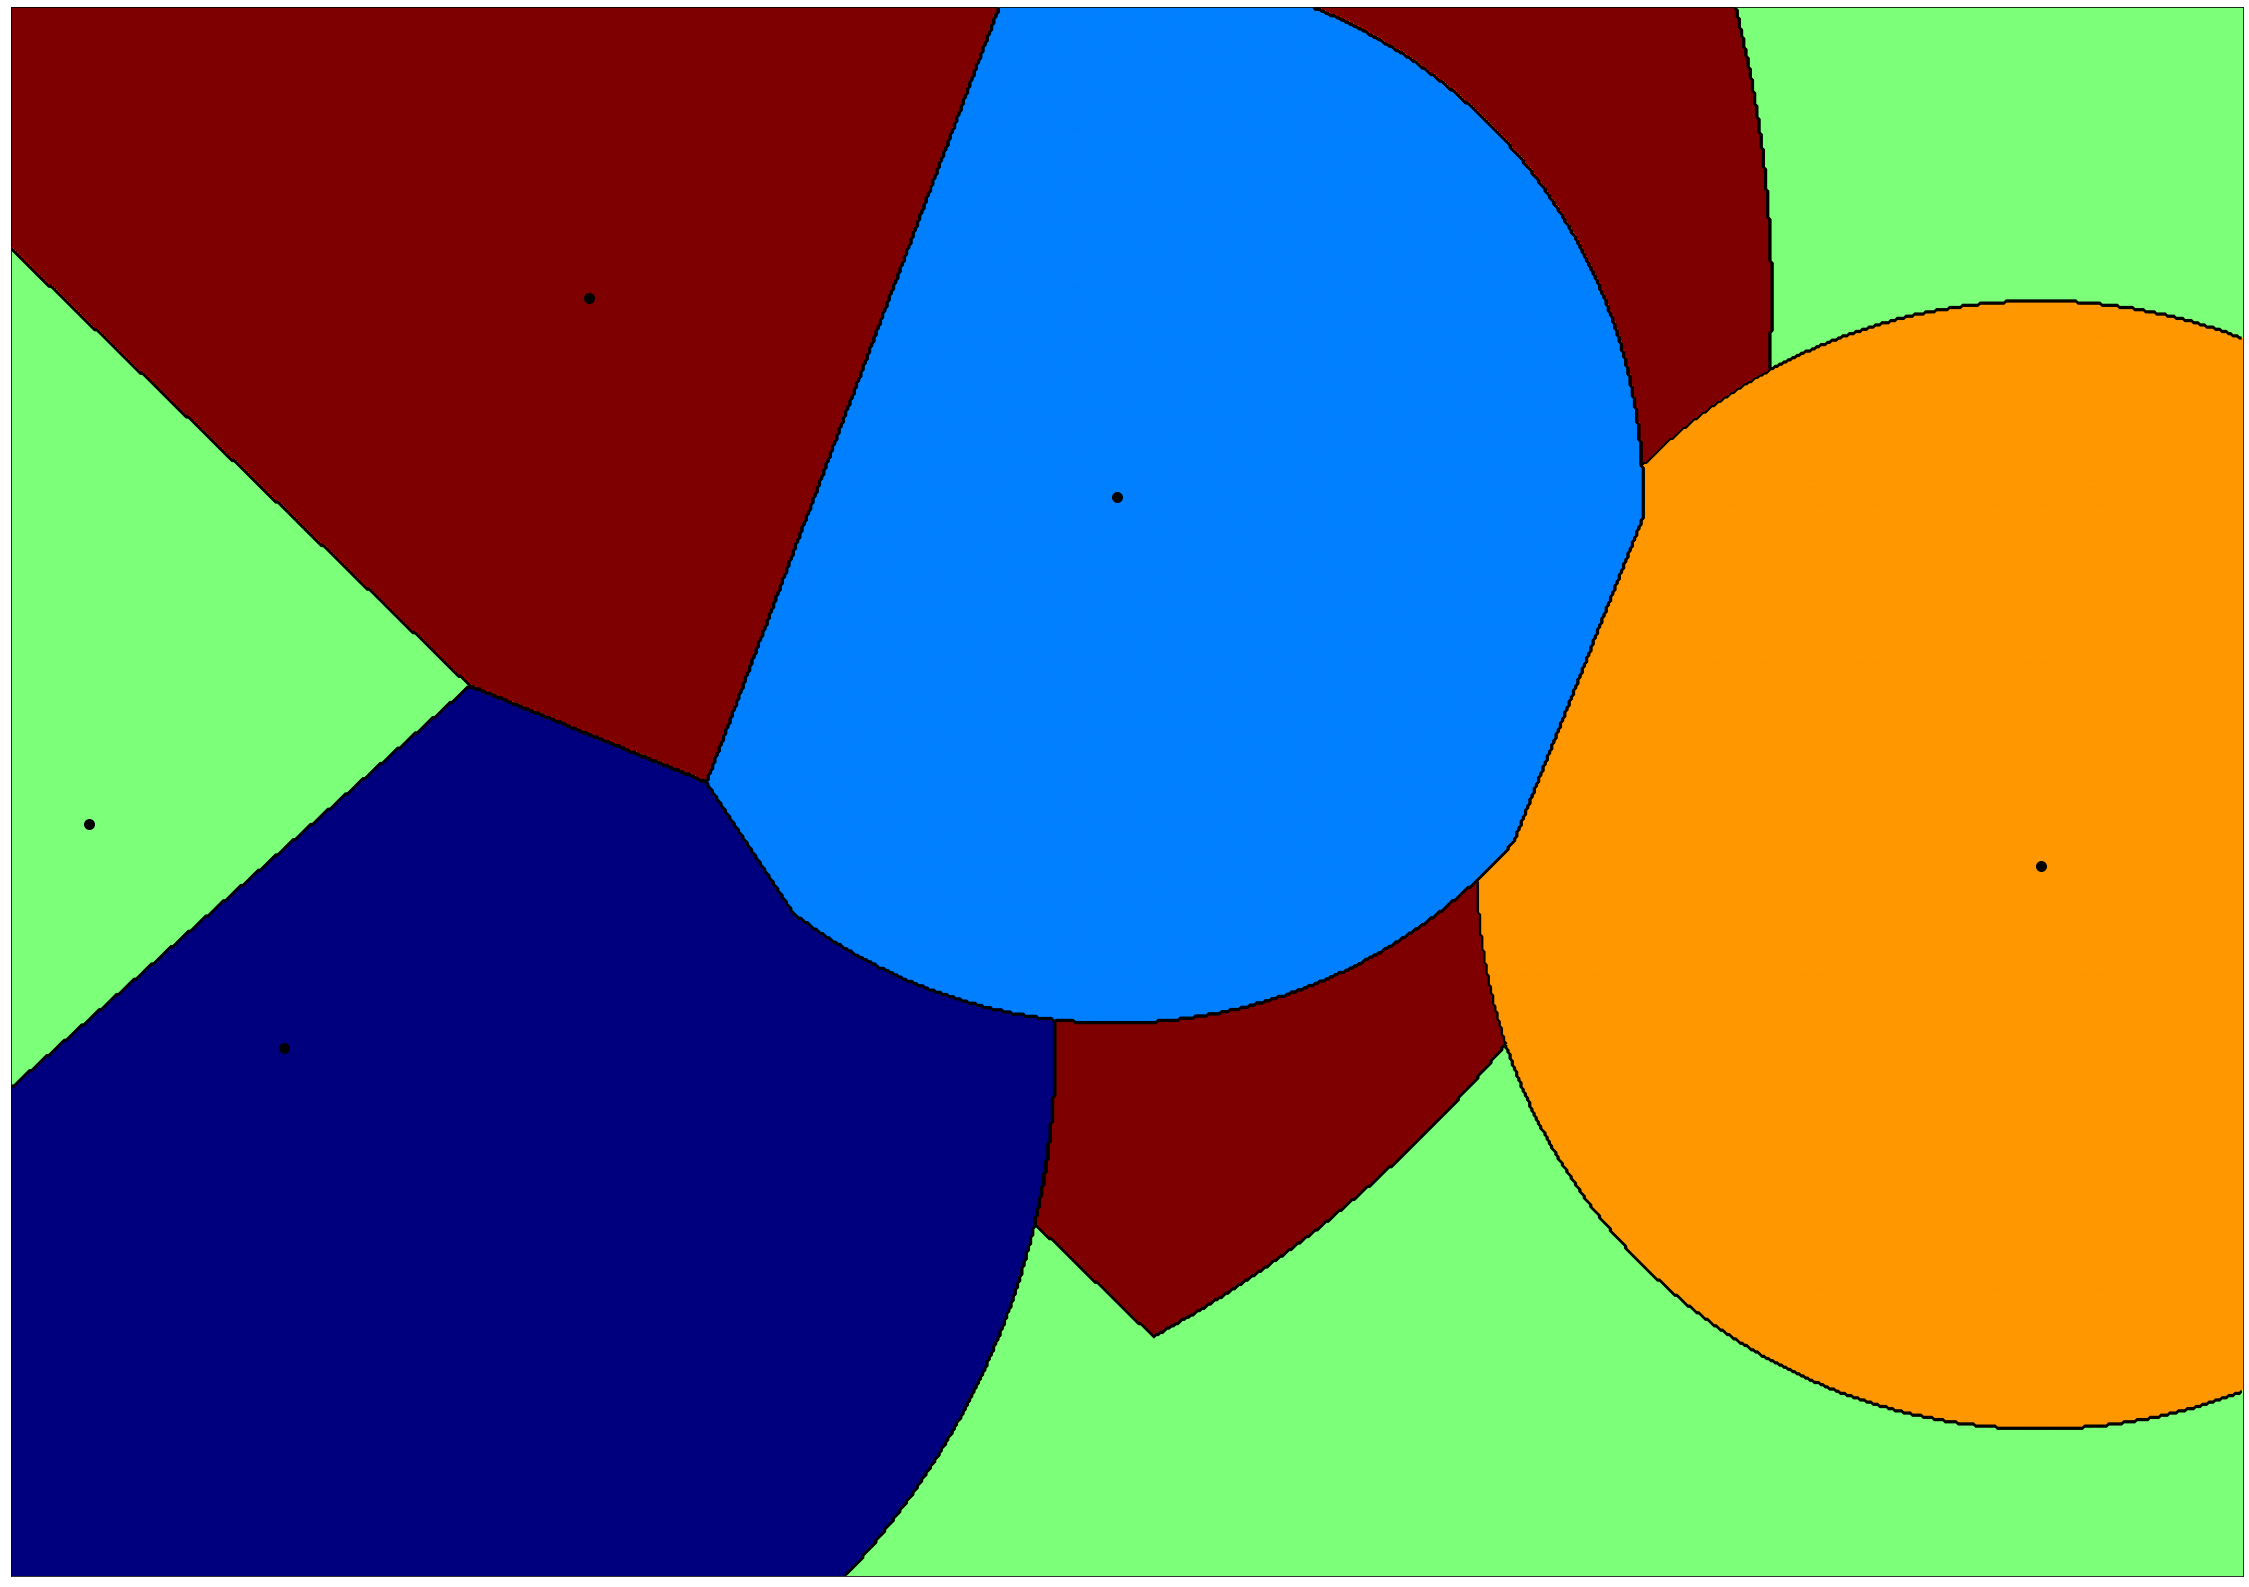

In [7]:
smup.compute(s=5)
smup.display()

More sites will produce a richer smup. Beware of time and space complexities that grow with `s`.

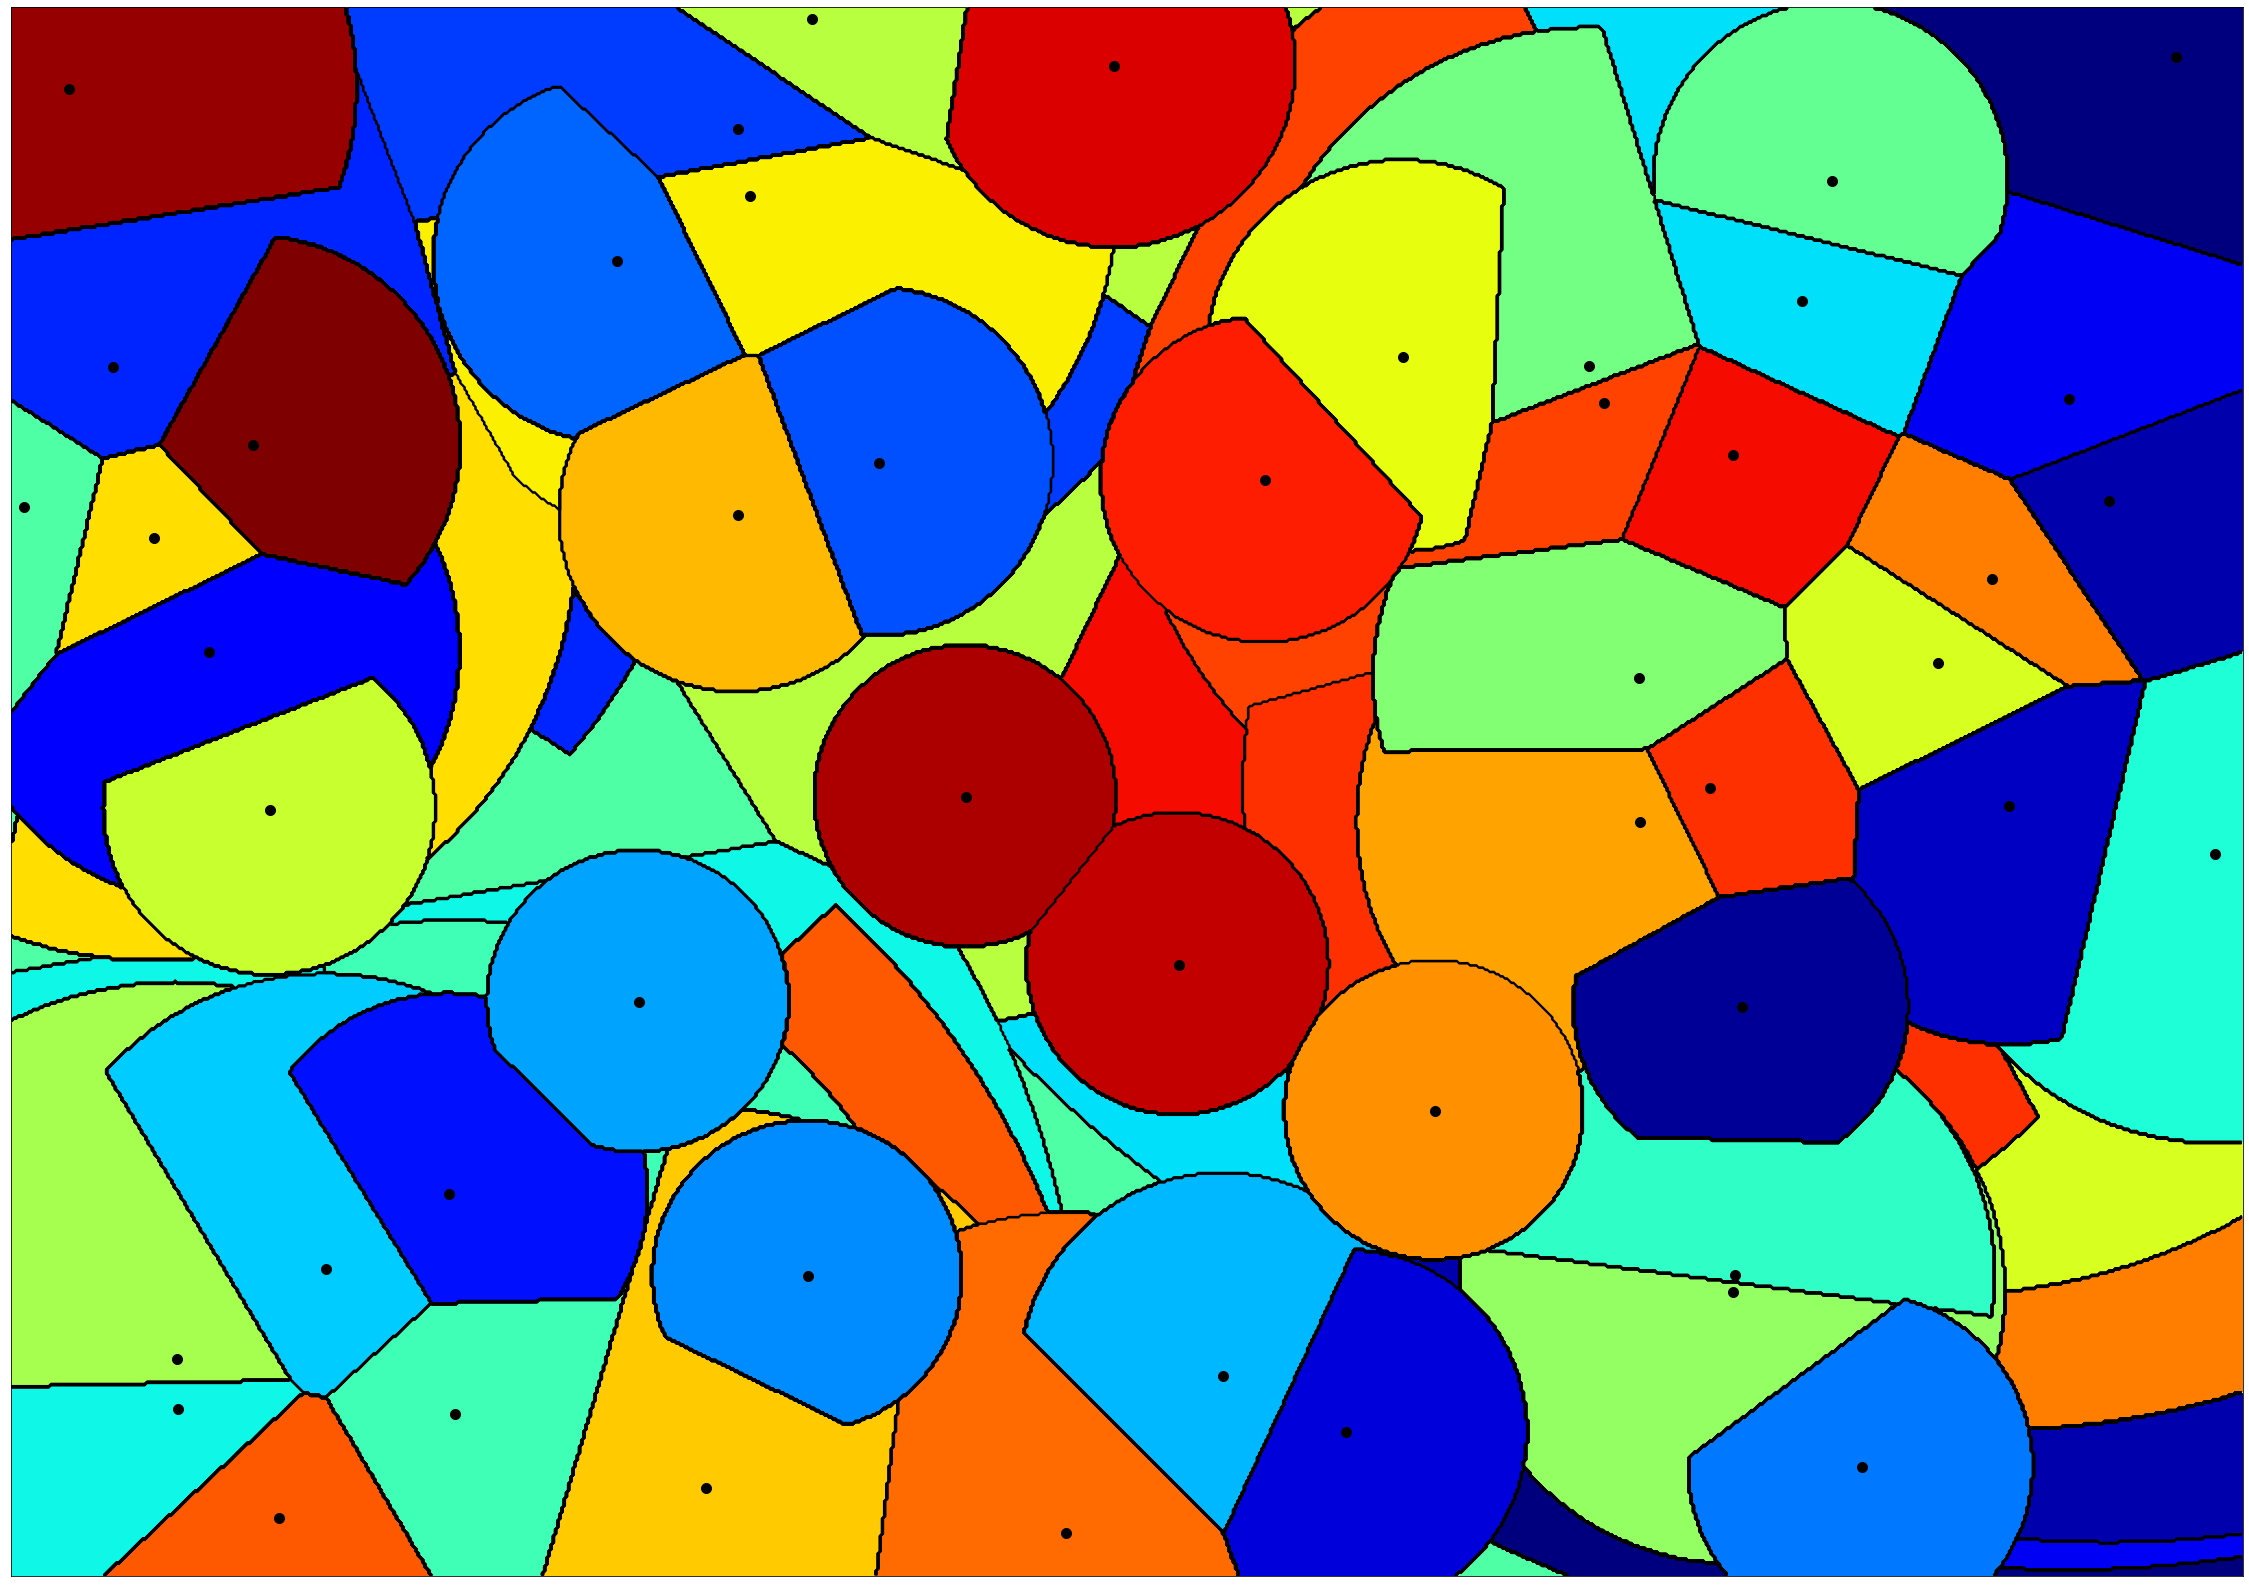

In [8]:
smup.compute(s=50)
smup.display()

## Display parameters

### Colormap

You can use any Matplotlib maps to change the colors of your smup. See the list here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

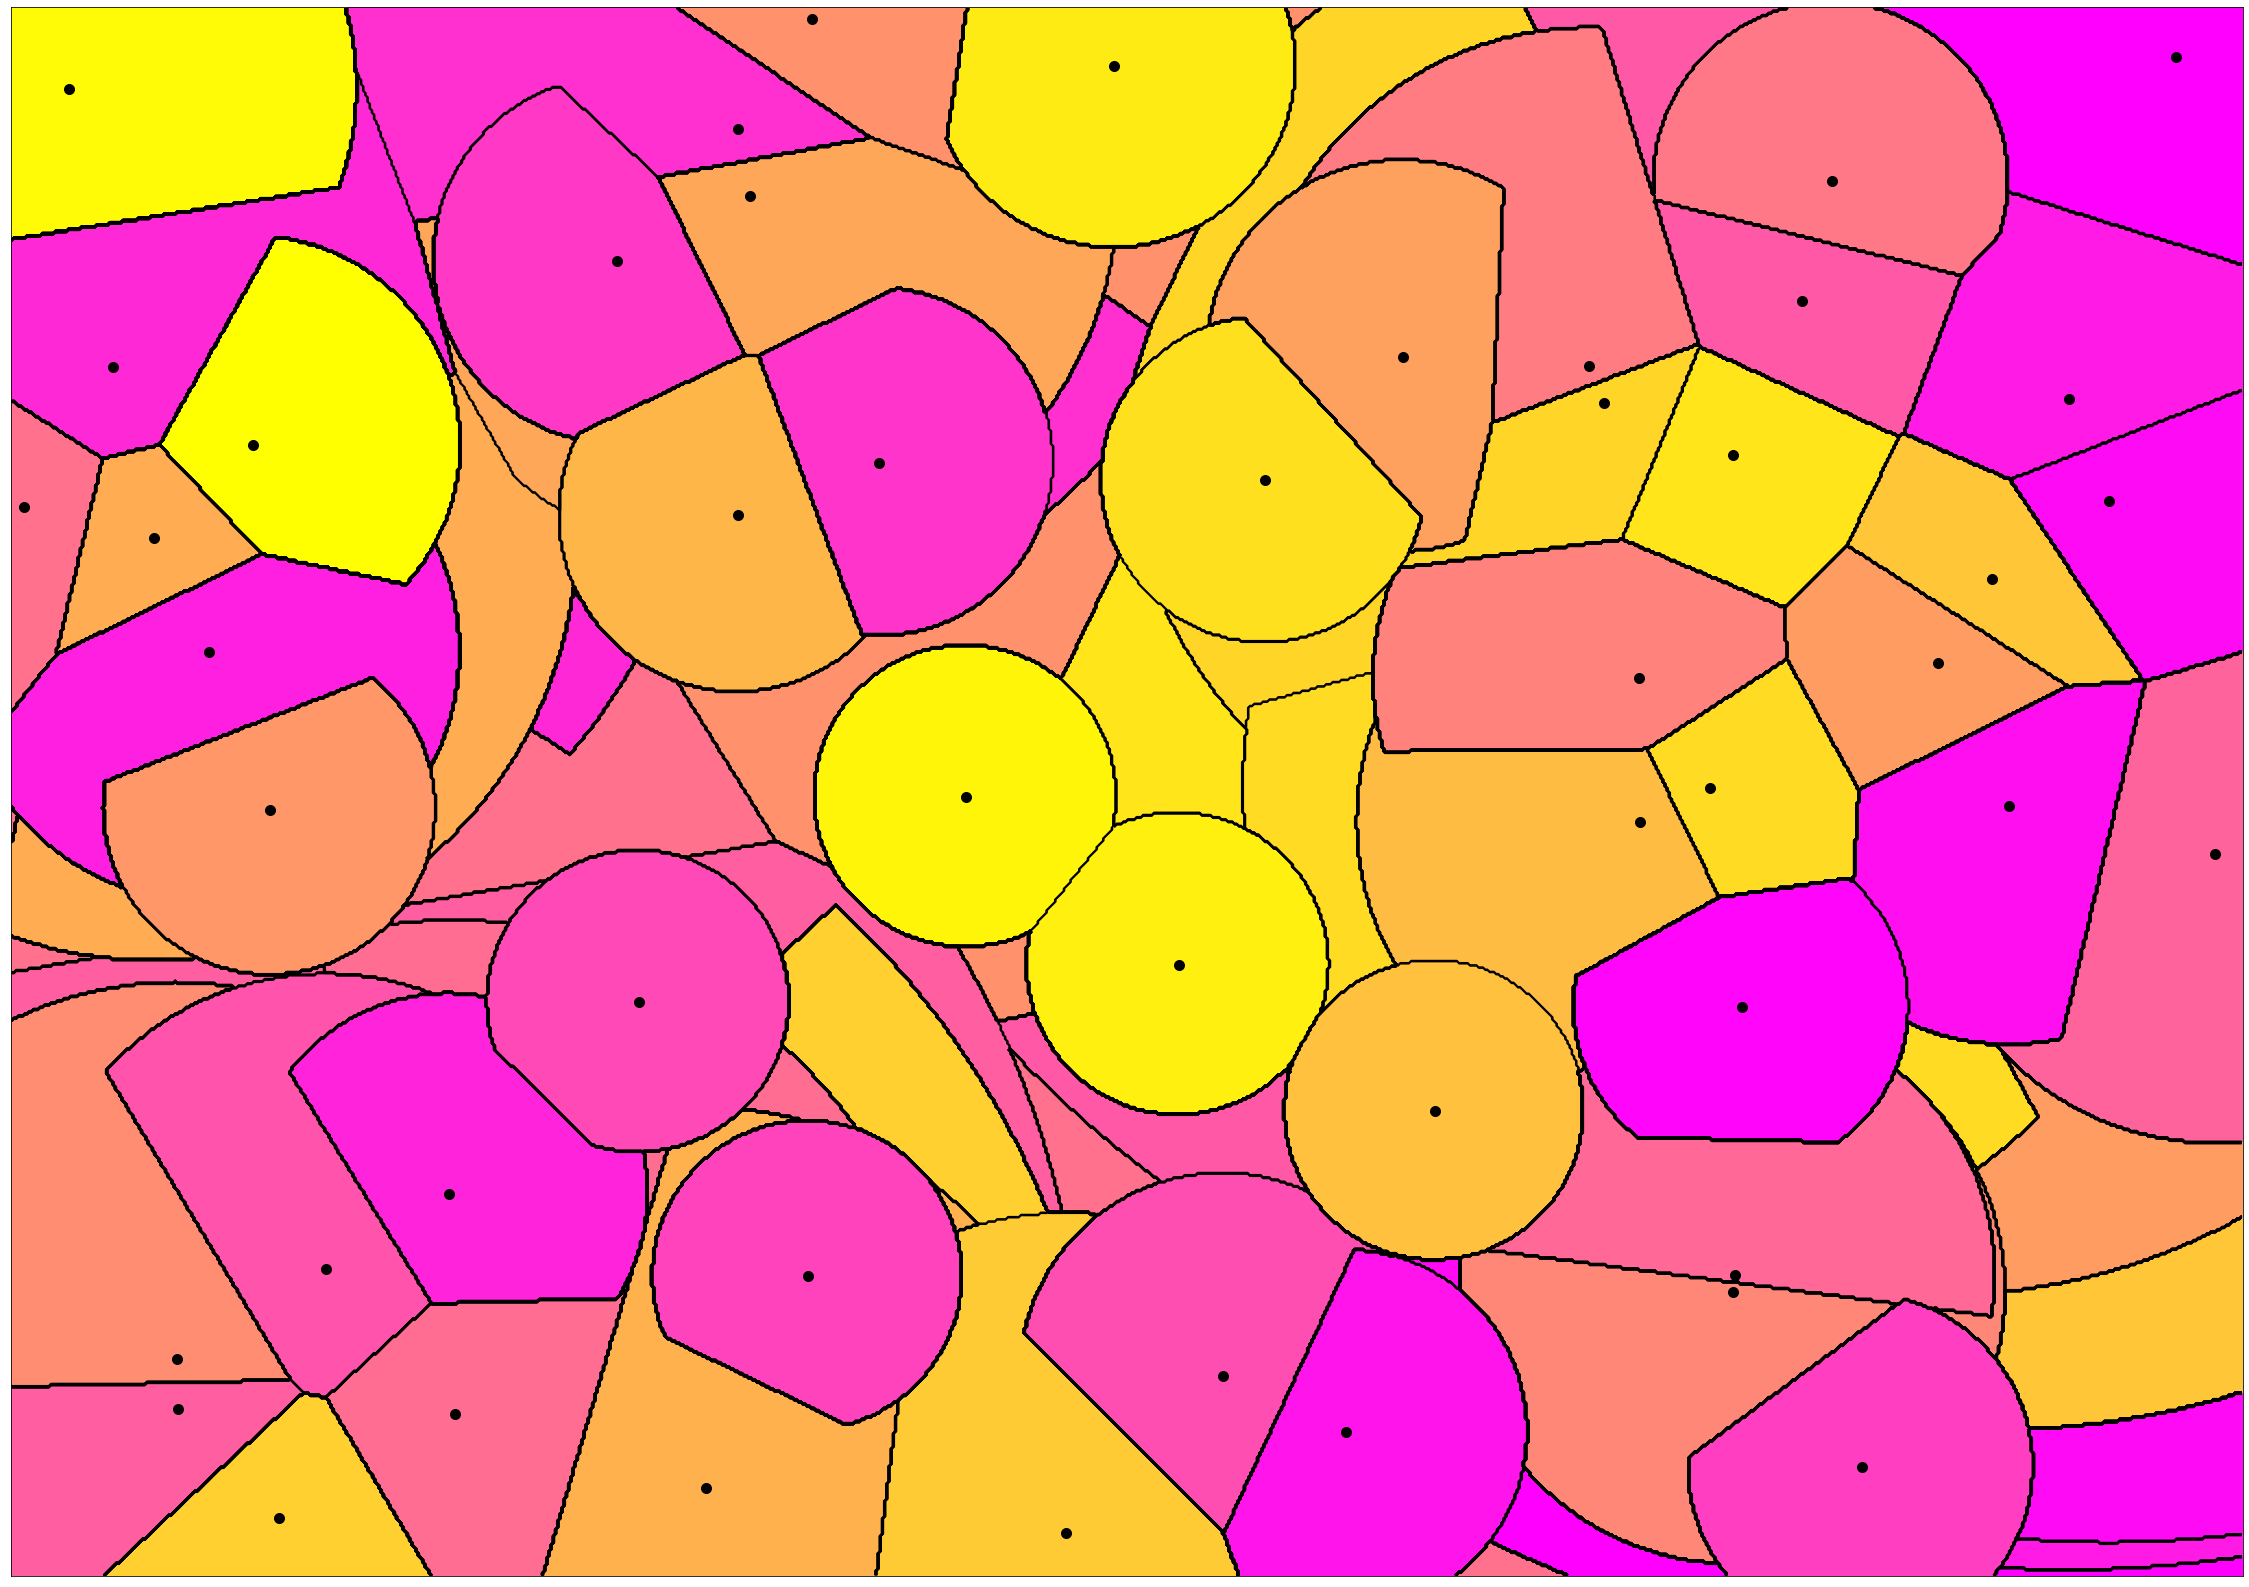

In [9]:
smup.display(cmap="spring")

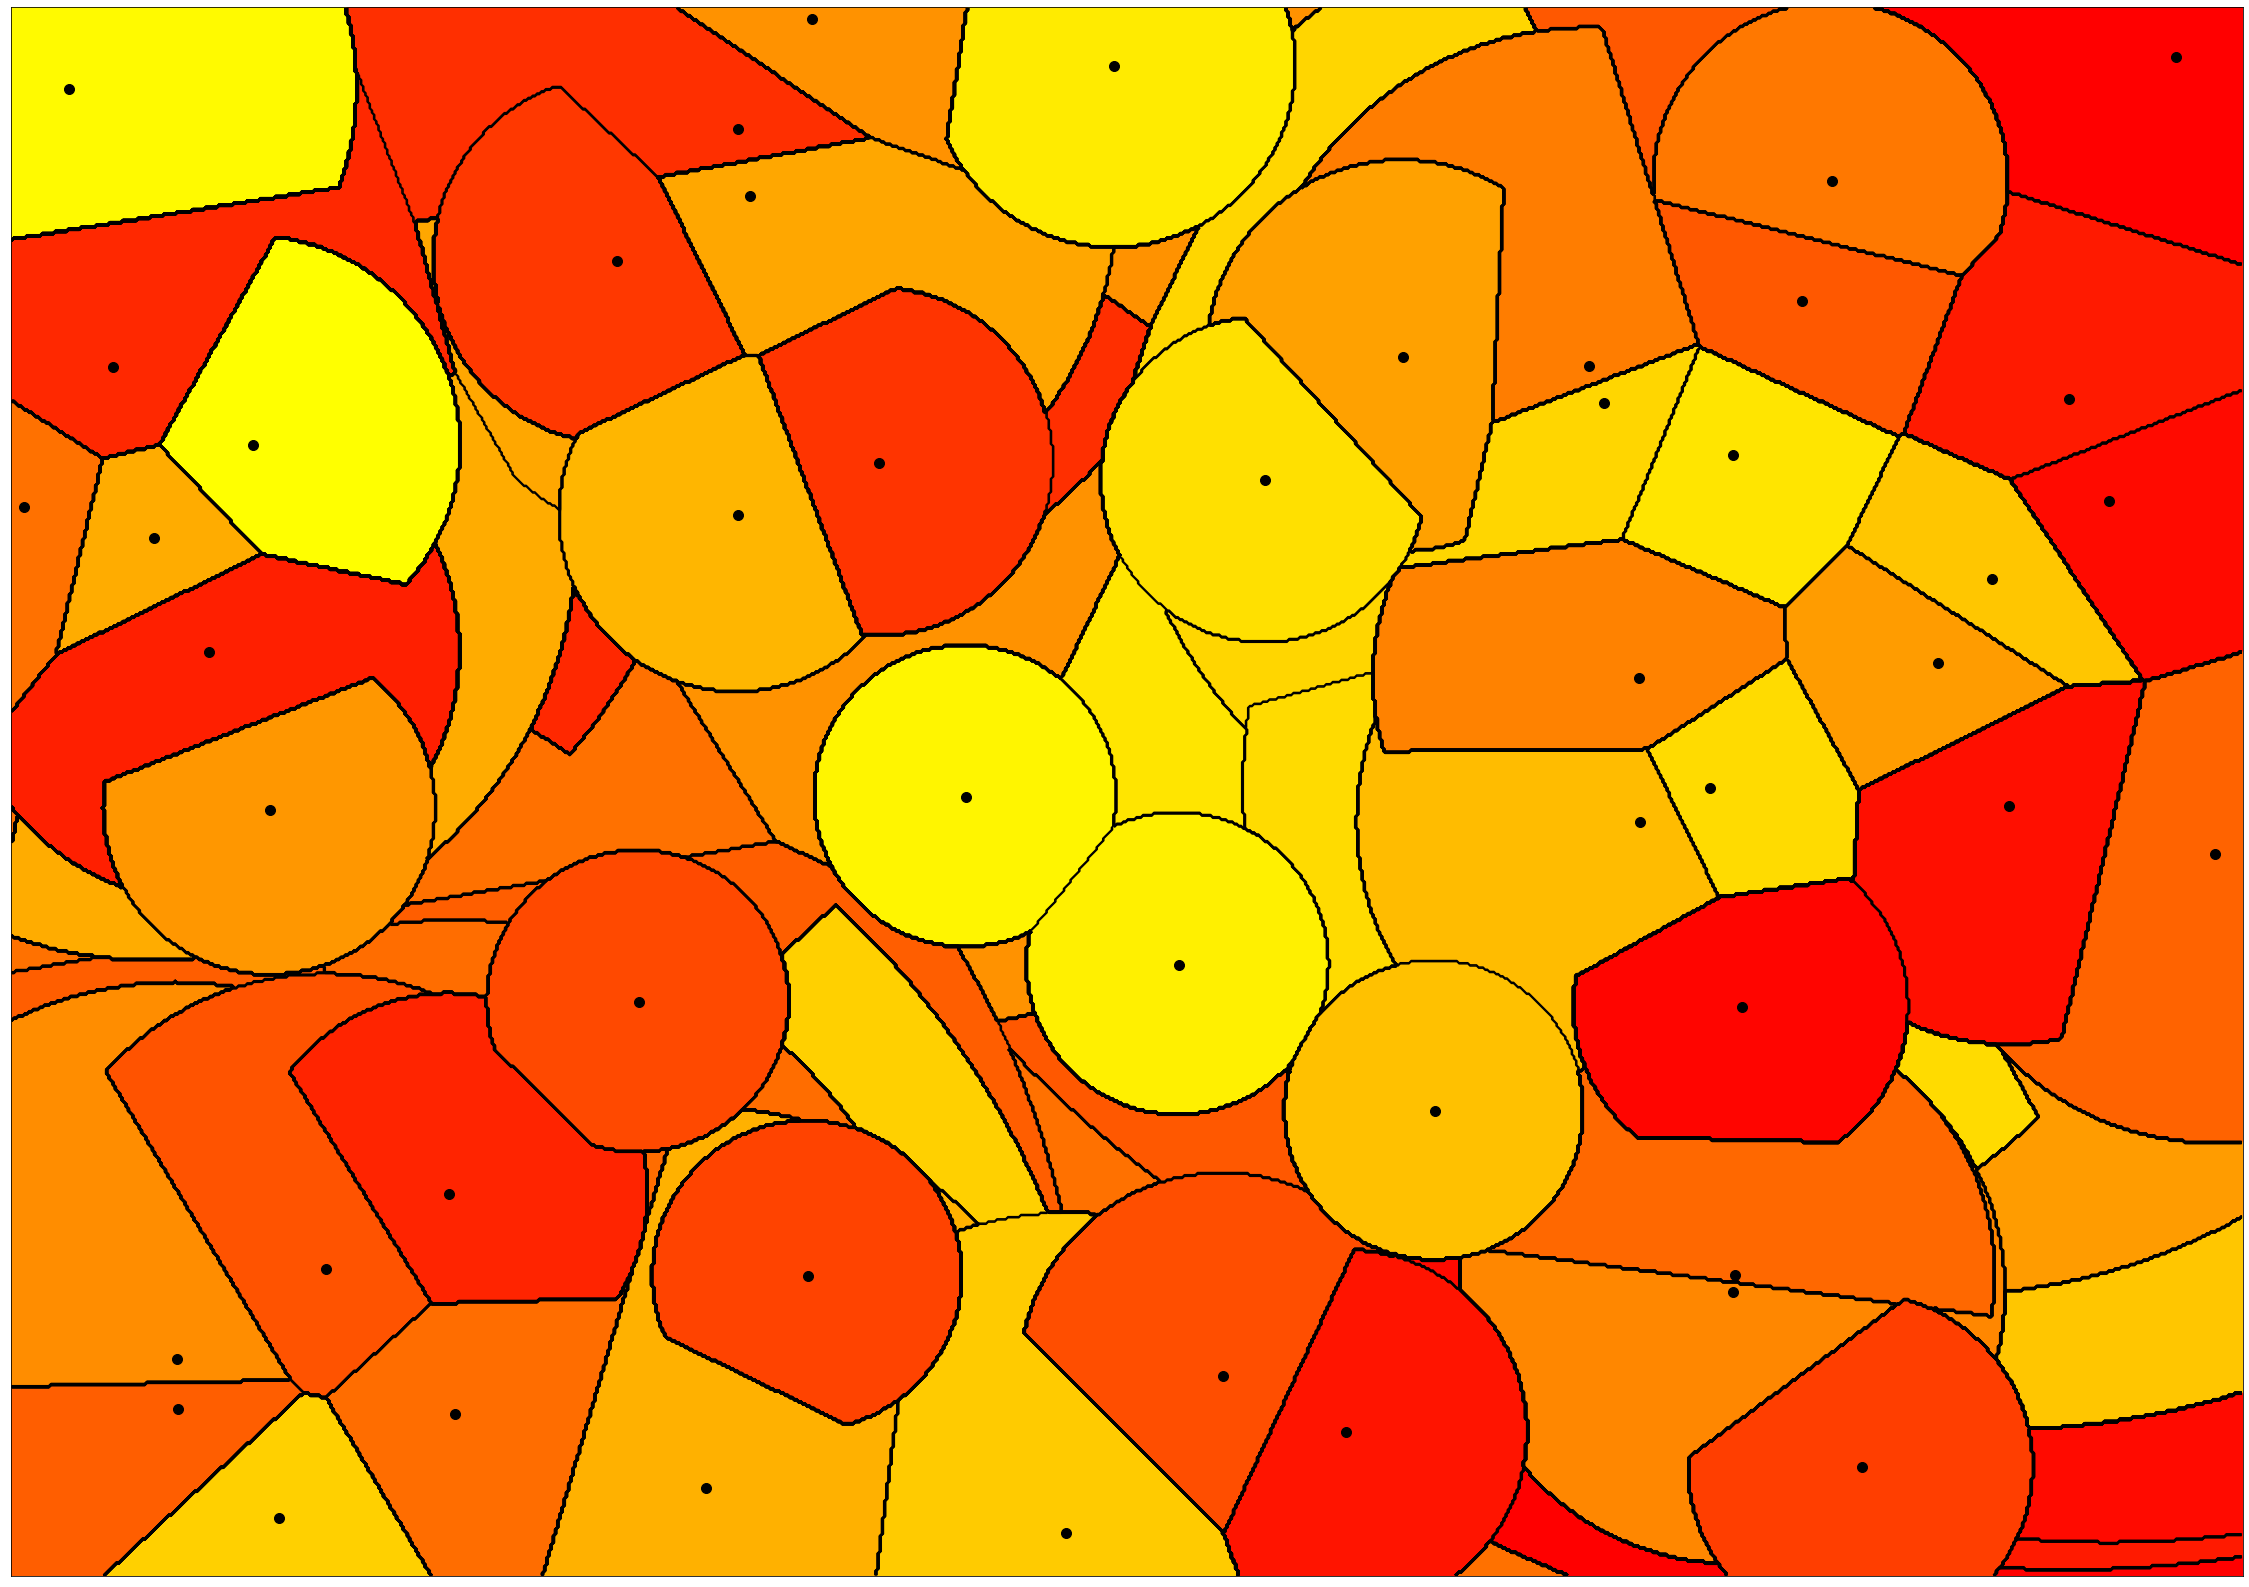

In [10]:
smup.display(cmap="autumn")

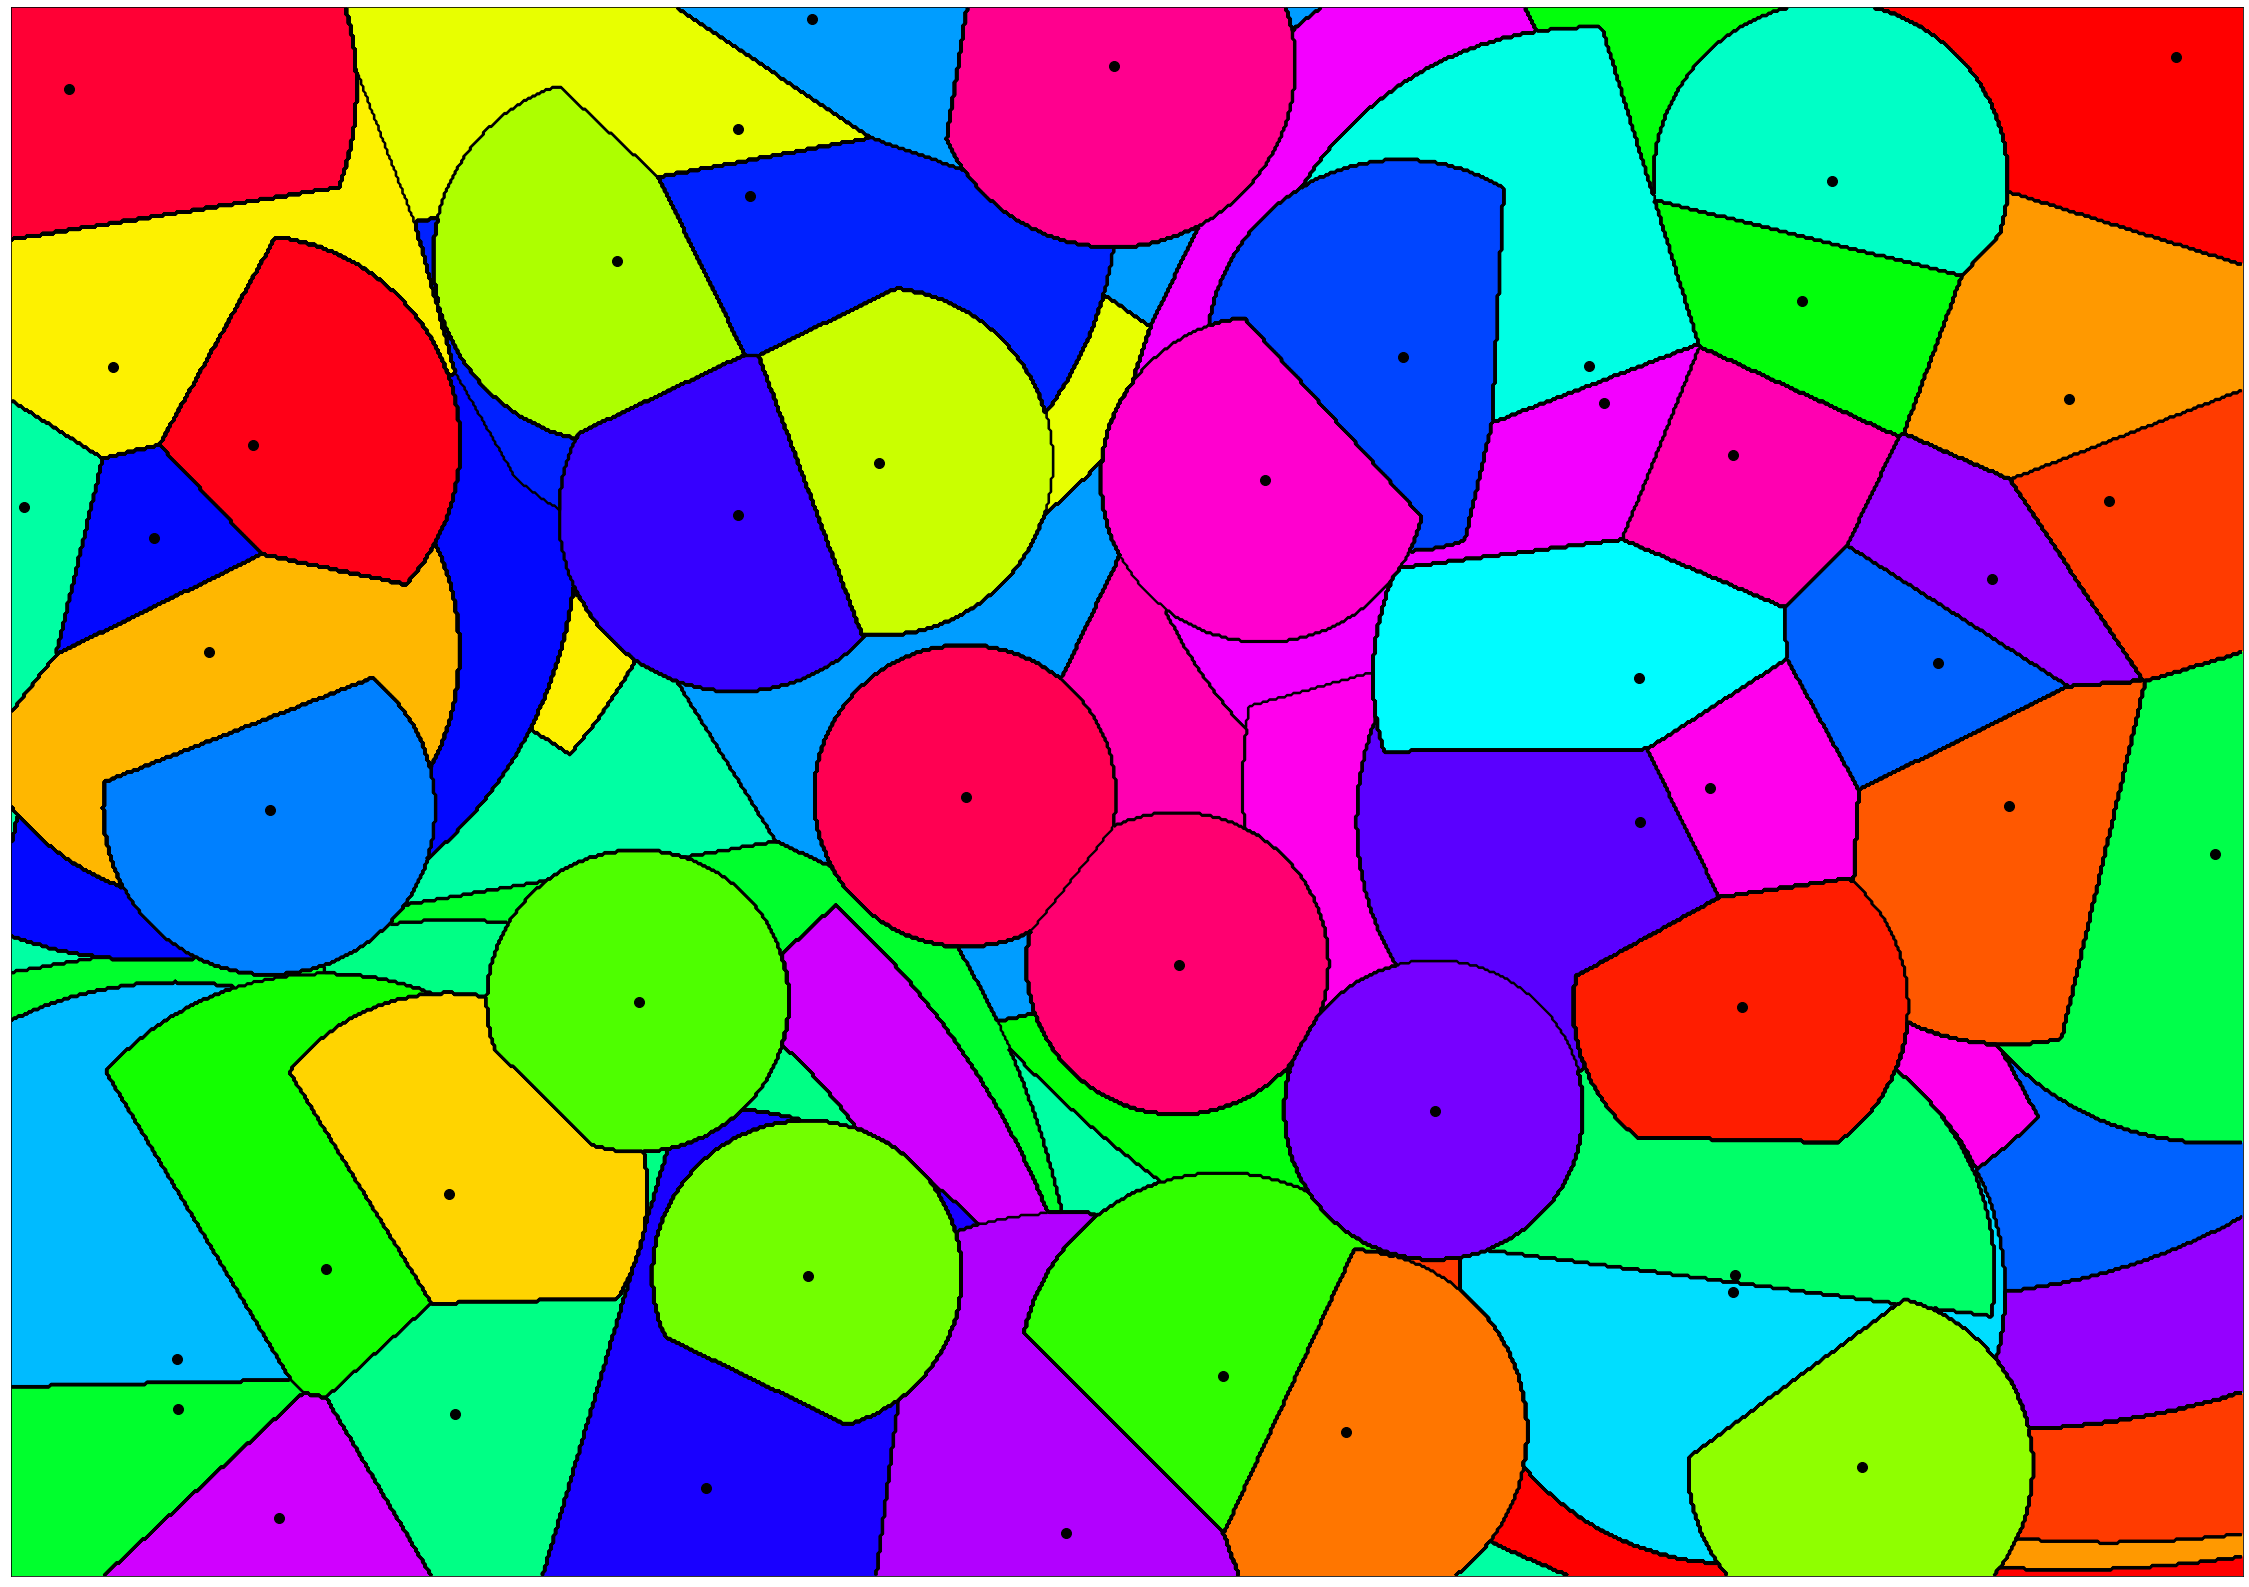

In [11]:
smup.display(cmap="hsv")

### Centers

The site centers help to understand the mechanisms of a smup, but a smup can look more mysterious if you don't show them.

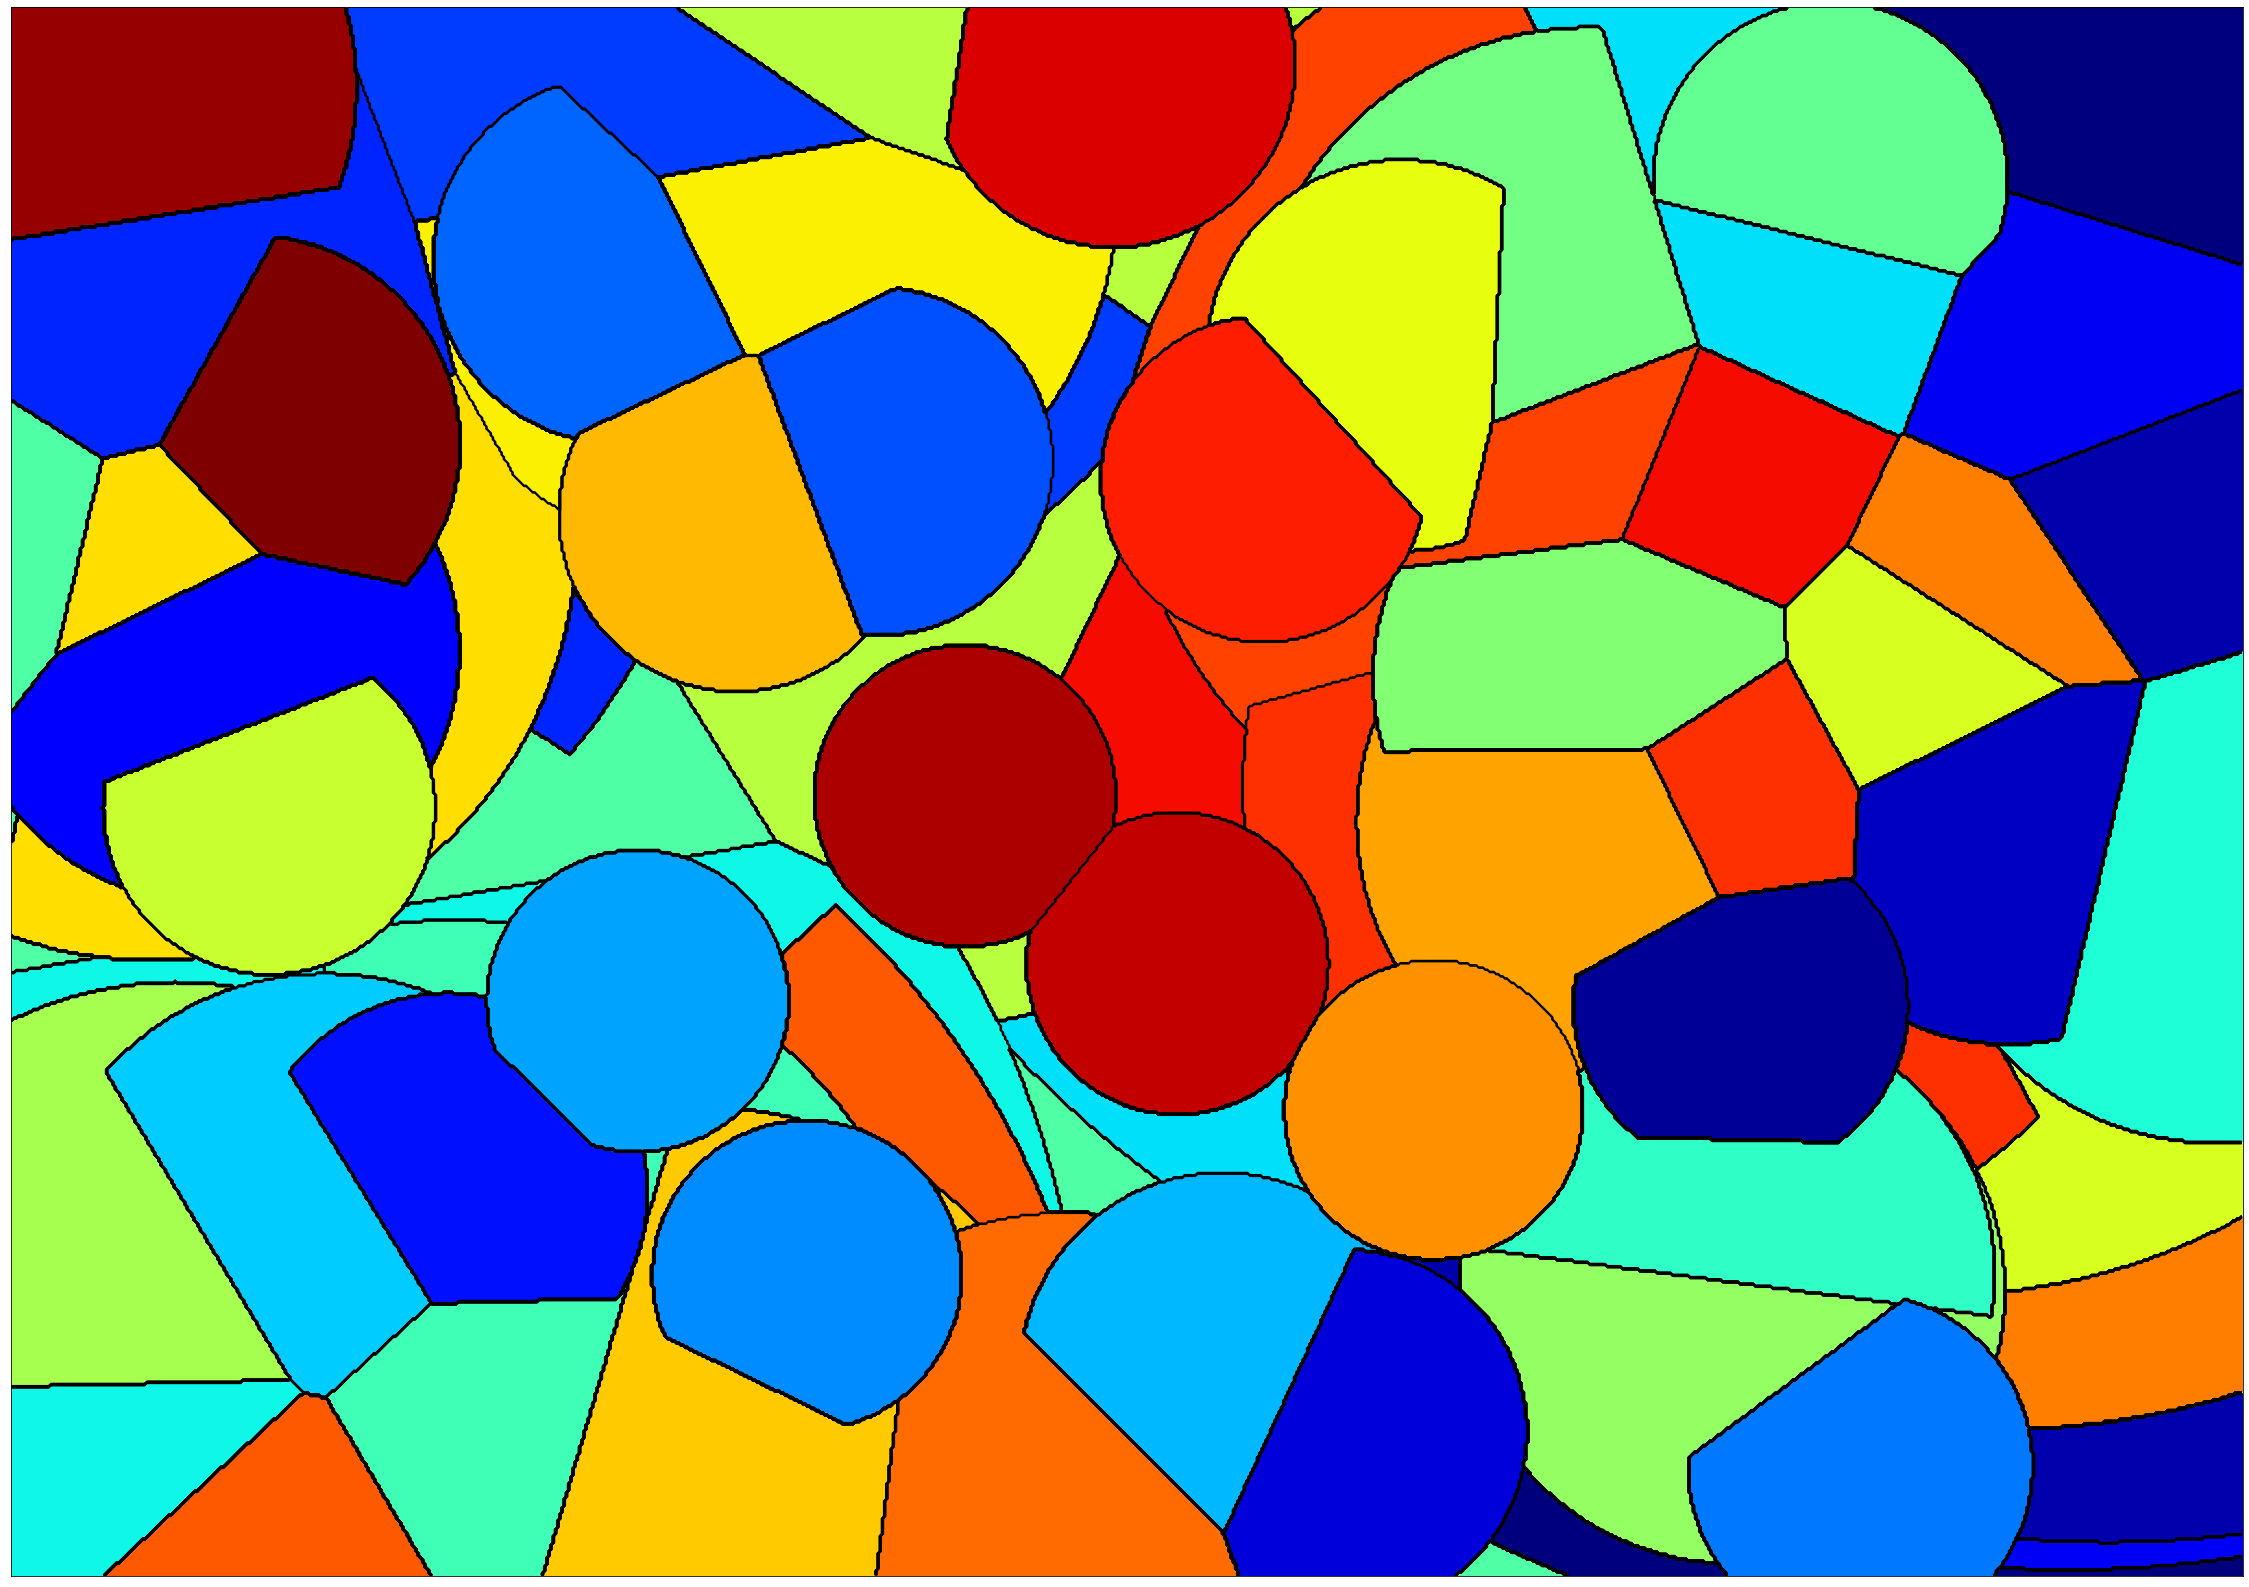

In [12]:
smup.display(draw_centers=False)

On the other hand, if you wish to show big centers, you can!

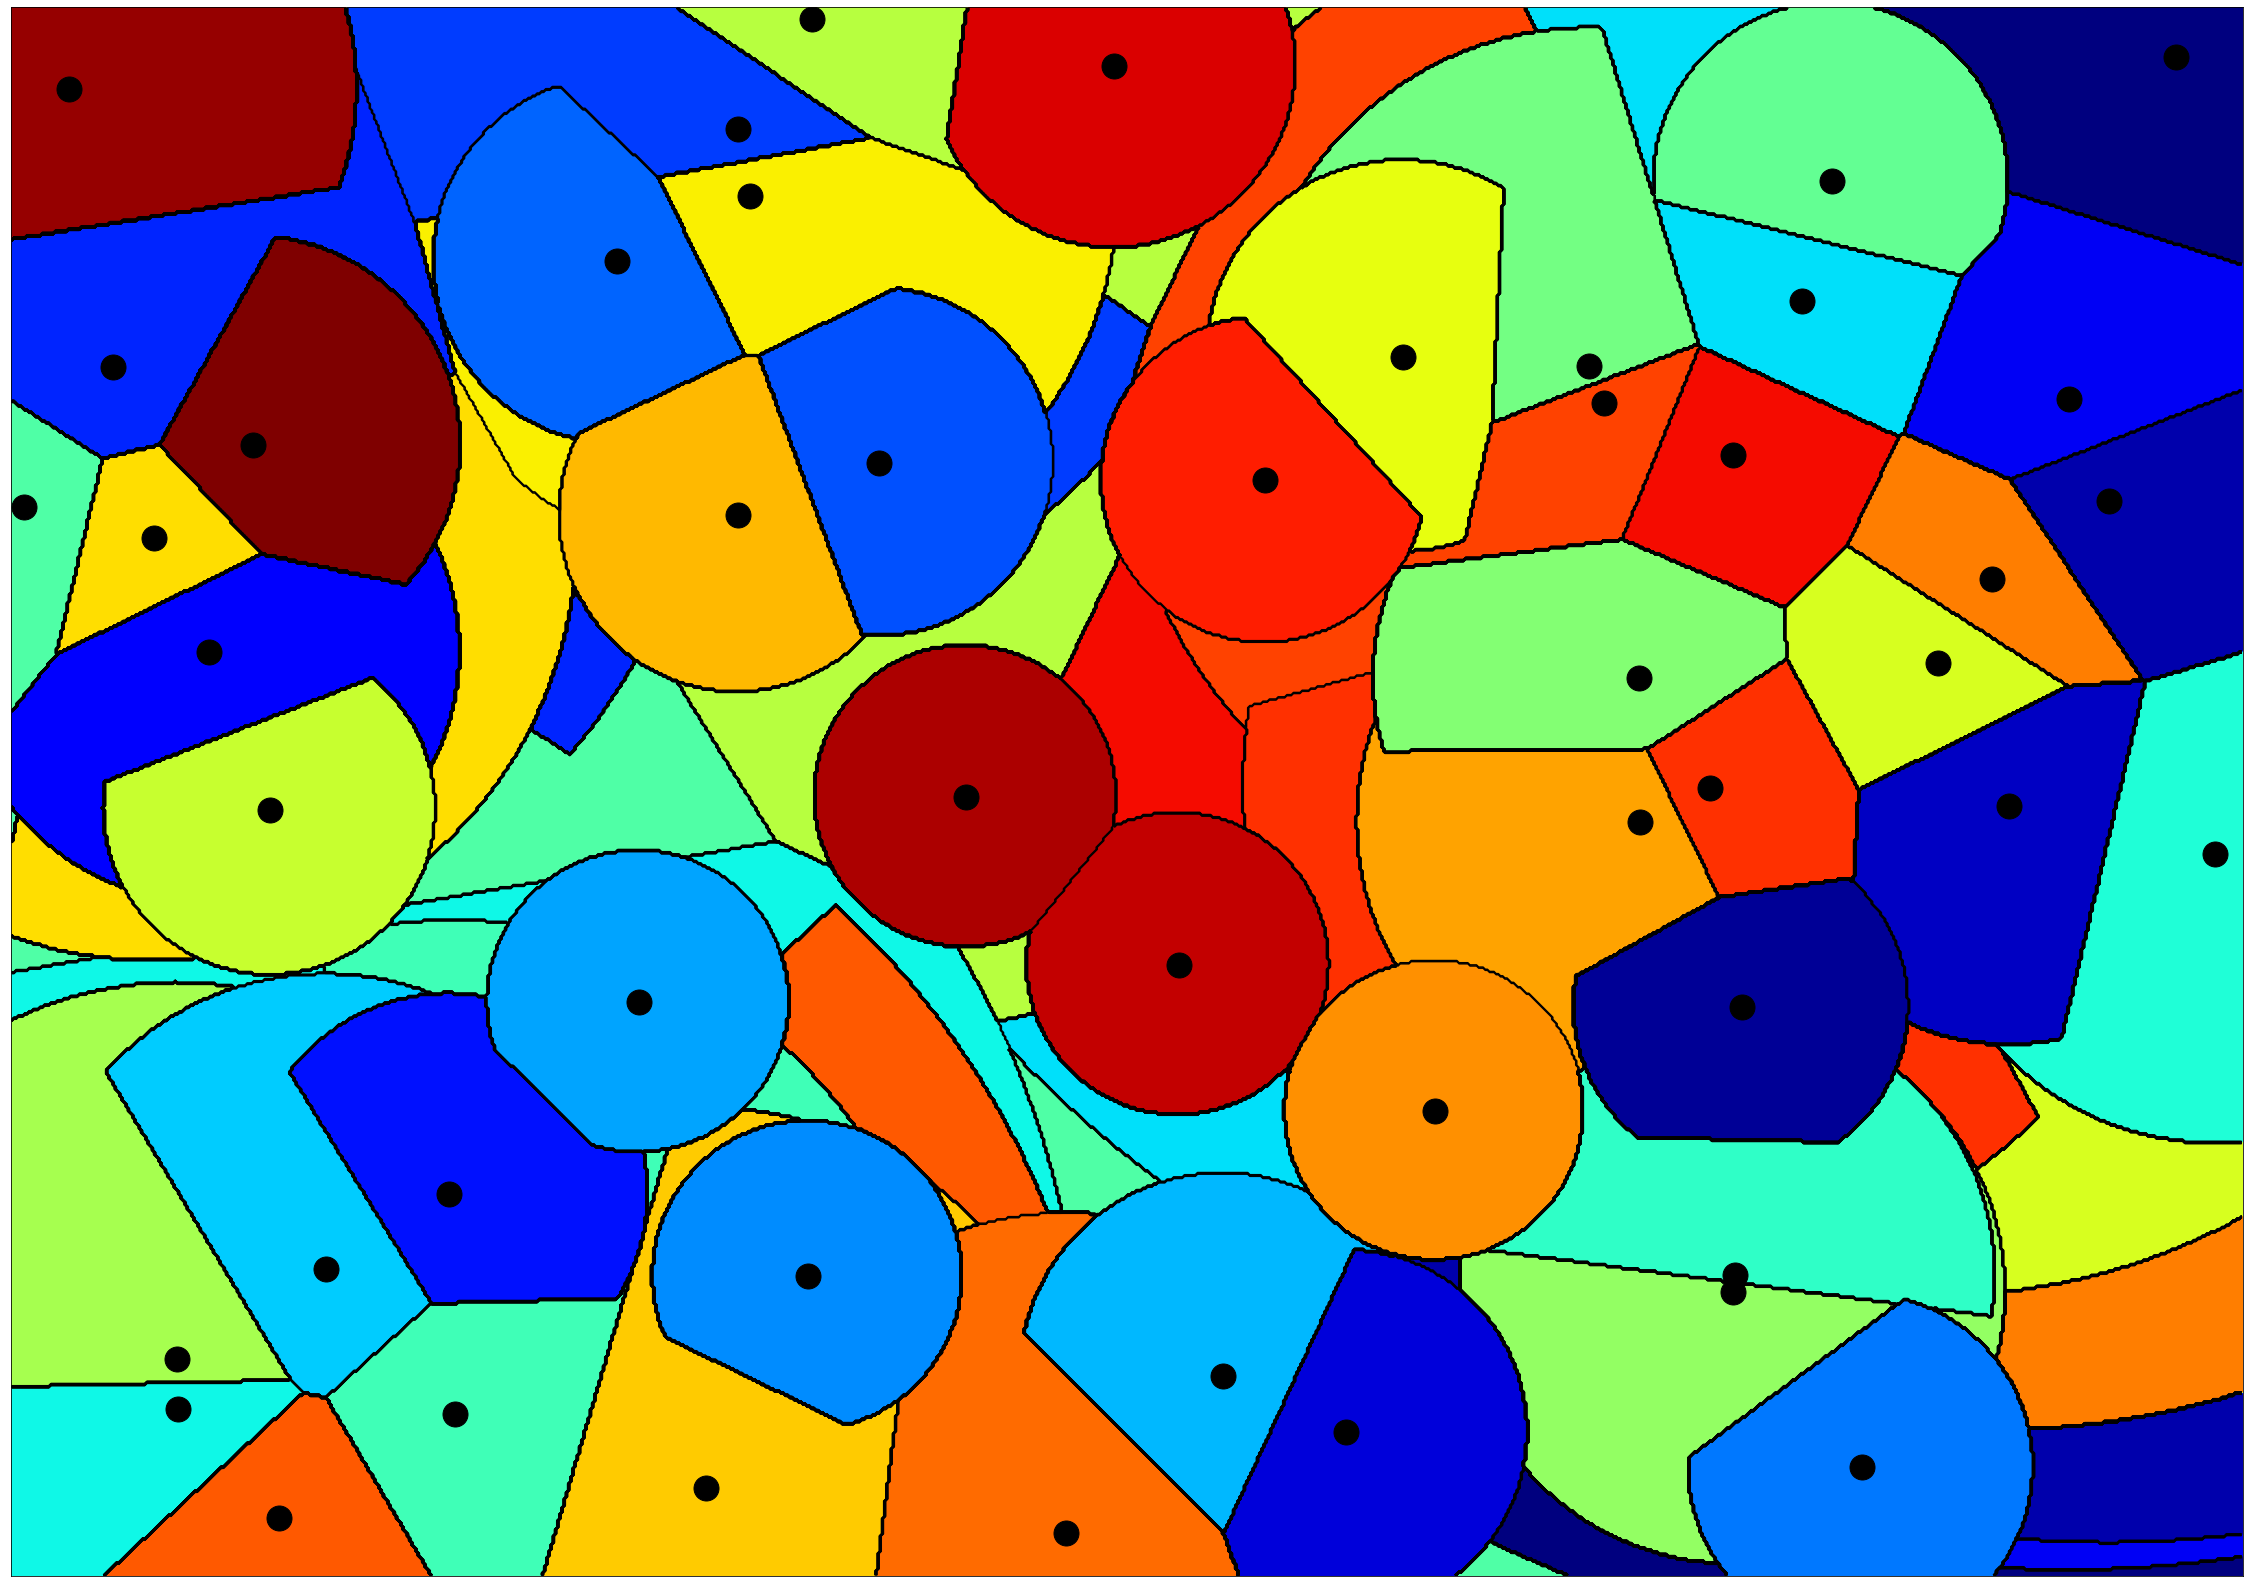

In [13]:
smup.display(center_size=50)

### Saving

To save the picture, just feed the `save` parameter with filename. Cf https://balouf.github.io/smup/reference/index.html#smup.smup.Smup.display

## Theory

A smup is just a $b$-matching between a set of centers drawn randomly at random and the pixels of the picture, with distances used as preferences. Funny thing with distance-based preferences is that they tend to follow a power-law distribution, which means that while most of the pixels will be attached close to their center, some pixels are exiled far away, possibly to the other end of the picture. Another funny thing is that if you run the propose/dispose algorithm by increasing distance, there is no rejection after acceptance, which allows to fasten the algorithm a bit.

The paragraph above doesn't mean anything to you? Don't panic, here are a few pointers:

- [College Admissions and the Stability of Marriage](https://www.eecs.harvard.edu/cs286r/courses/fall09/papers/galeshapley.pdf), the original article on stable matchings.
- [A Stable Marriage of Poisson and Lebesgue](https://arxiv.org/pdf/math/0505668.pdf), a mathematical approach to smups.
- [The Stable Configuration of Acyclic Preference-Based Systems](https://ieeexplore.ieee.org/document/5062060), my own (useless?) research on the topic.